<a href="https://colab.research.google.com/github/shreyap-17/INSE_6220_Final_Project/blob/main/INSE6220_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset Description:**
The Heart Disease Dataset from Kaggle consists of clinical and physiological parameters collected from individuals evaluated for heart disease.

Key features in this dataset include age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, and thalassemia. The target variable is a binary indicator of the presence (values 1) or absence (value 0) of heart disease in the patient.

The original dataset can be found on below link: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset?select=heart_statlog_cleveland_hungary_final.csv

**PyCaret** is an open-source, low-code machine learning library in Python that aims to reduce the cycle time from hypothesis to insights. It is a simple and efficient tool for performing end-to-end advanced analytics tasks such as data preprocessing, feature engineering, model training, and model evaluation. PyCaret is designed to make the pipeline development streamlined and accessible for both experienced data scientists and beginners in the field.

In [46]:
!pip3 install pycaret==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.8 MB/

In [1]:
from pycaret.utils import version
version()

'3.0.0'

This section loads necessary Python libraries for data manipulation, analysis, and visualization.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


### **1. Data Loading and Initial Exploration:**
**Code:** I import the dataset using pandas and utilize initial functions like df.head() to inspect the first few entries and df.shape() and df.info() for a preliminary understanding of data distributions and types.

**Purpose:** These steps help in assessing data quality, understanding feature scales, and identifying any immediate preprocessing needs such as handling missing values or categorical encoding.

The dataset related to heart diseases is loaded into a pandas DataFrame, and the first few rows are displayed to check the structure of the data.

In [4]:
#https://www.kaggle.com/datasets/mexwell/heart-disease-dataset?select=heart_statlog_cleveland_hungary_final.csv
df= pd.read_csv('/content/drive/MyDrive/heart_statlog_cleveland_hungary_final.csv')
df.head(25)

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0    40    1                2           140          289                    0   
1    49    0                3           160          180                    0   
2    37    1                2           130          283                    0   
3    48    0                4           138          214                    0   
4    54    1                3           150          195                    0   
5    39    1                3           120          339                    0   
6    45    0                2           130          237                    0   
7    54    1                2           110          208                    0   
8    37    1                4           140          207                    0   
9    48    0                2           120          284                    0   
10   37    0                3           130          211                    0   
11   58    1                2           136          164                    0   
12   39    1                2           120          204                    0   
13   49    1                4           140          234                    0   
14   42    0                3           115          211                    0   
15   54    0                2           120          273                    0   
16   38    1                4           110          196                    0   
17   43    0                2           120          201                    0   
18   60    1                4           100          248                    0   
19   36    1                2           120          267                    0   
20   43    0                1           100          223                    0   
21   44    1                2           120          184                    0   
22   49    0                2           124          201                    0   
23   44    1                2           150          288                    0   
24   40    1                3           130          215                    0   

    resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0             0             172                0      0.0         1       0  
1             0             156                0      1.0         2       1  
2             1              98                0      0.0         1       0  
3             0             108                1      1.5         2       1  
4             0             122                0      0.0         1       0  
5             0             170                0      0.0         1       0  
6             0             170                0      0.0         1       0  
7             0             142                0      0.0         1       0  
8             0             130                1      1.5         2       1  
9             0             120                0      0.0         1       0  
10            0             142                0      0.0         1       0  
11            1              99                1      2.0         2       1  
12            0             145                0      0.0         1       0  
13            0             140                1      1.0         2       1  
14            1             137                0      0.0         1       0  
15            0             150                0      1.5         2       0  
16            0             166                0      0.0         2       1  
17            0             165                0      0.0         1       0  
18            0             125                0      1.0         2       1  
19            0             160                0      3.0         2       1  
20            0             142                0      0.0         1       0  
21            0             142                0      1.0         2       0  
22            0             164                0      0.0         1       0  
23            0          

In [5]:
df.tail(10)

age  sex  chest pain type  resting bp s  cholesterol  \
1180   63    1                4           140          187   
1181   63    0                4           124          197   
1182   41    1                2           120          157   
1183   59    1                4           164          176   
1184   57    0                4           140          241   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
1180                    0            2             144                1   
1181                    0            0             136                1   
1182                    0            0             182                0   
1183                    1            2              90                0   
1184                    0            0             123                1   
1185                    0            0             132                0   
1186                    1            0             141                0   
1187                    0            0             115                1   
1188                    0            2             174                0   
1189                    0            0             173                0   

      oldpeak  ST slope  target  
1180      4.0         1       1  
1181      0.0         2       1  
1182      0.0         1       0  
1183      1.0         2       1  
1184      0.2         2       1  
1185      1.2         2       1  
1186      3.4         2       1  
1187      1.2         2       1  
1188      0.0         2       1  
1189      0.0         1       0

In [6]:
df.shape

(1190, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  272


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


## **2. Data Visualization:**
**Code:** I employ seaborn for visualization, such as using pairplot to visualize pairwise relationships and distribution of the dataset across different dimensions.

**Purpose:** I aids in identifying patterns, trends, and relationships that might be pertinent to predicting heart disease.


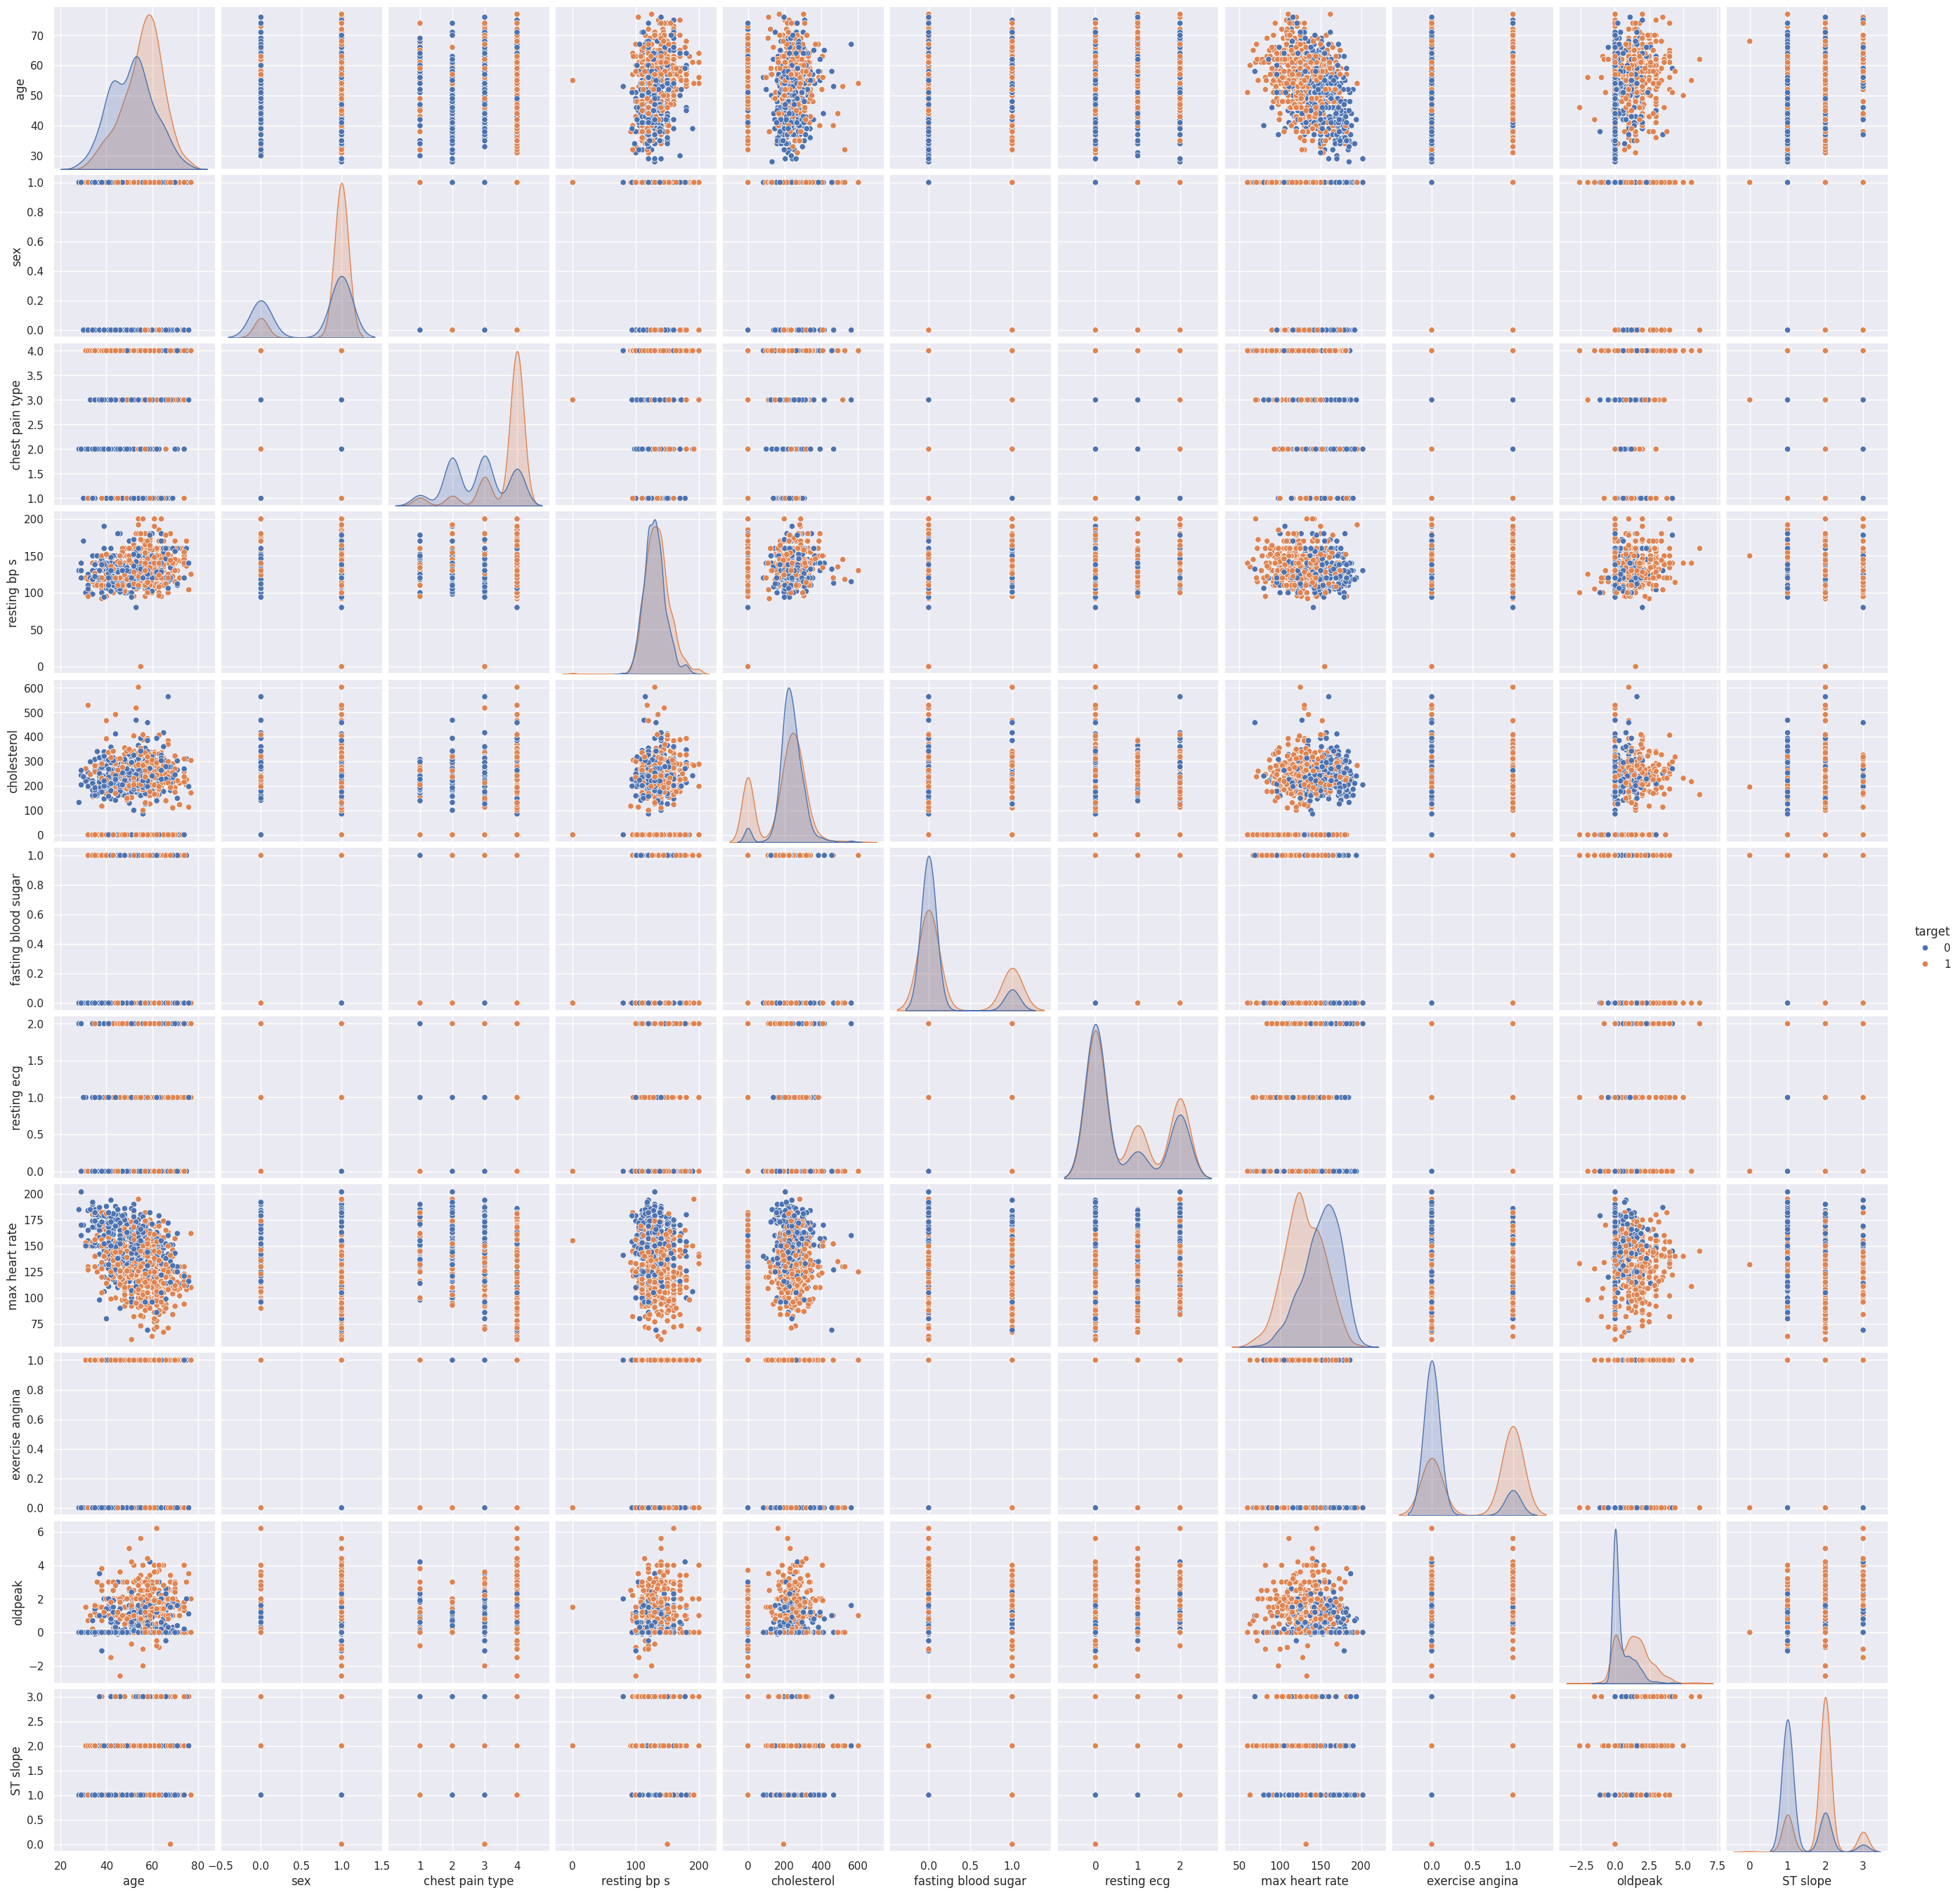

In [18]:
#sns.pairplot is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.
sns.pairplot(df, hue='target')
plt.show()

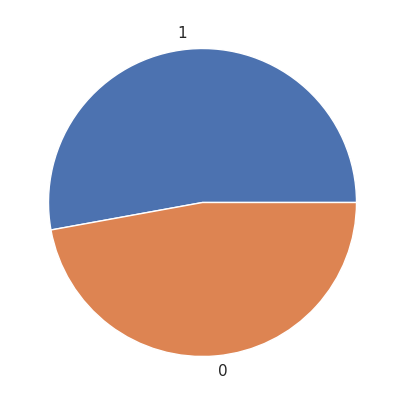

In [6]:
#Pie-chart
y =df['target']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

## **3. Data Preprocessing:**
**Code:** StandardScaler from sklearn is used to scale the features to have zero mean and unit variance, which is crucial for models that are sensitive to the magnitude of input features.

**Purpose:** Ensures that all features contribute equally to the analysis, improving model accuracy and convergence speed.

Data Matrix

In [7]:
X = df.drop(columns=['target'])
X.head(10)

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   
5   39    1                3           120          339                    0   
6   45    0                2           130          237                    0   
7   54    1                2           110          208                    0   
8   37    1                4           140          207                    0   
9   48    0                2           120          284                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  
0            0             172                0      0.0         1  
1            0             156                0      1.0         2  
2            1              98                0      0.0         1  
3            0             108                1      1.5         2  
4            0             122                0      0.0         1  
5            0             170                0      0.0         1  
6            0             170                0      0.0         1  
7            0             142                0      0.0         1  
8            0             130                1      1.5         2  
9            0             120                0      0.0         1

In [8]:
X.describe().transpose()

count        mean         std   min    25%    50%  \
age                  1190.0   53.720168    9.358203  28.0   47.0   54.0   
sex                  1190.0    0.763866    0.424884   0.0    1.0    1.0   
chest pain type      1190.0    3.232773    0.935480   1.0    3.0    4.0   
resting bp s         1190.0  132.153782   18.368823   0.0  120.0  130.0   
cholesterol          1190.0  210.363866  101.420489   0.0  188.0  229.0   
fasting blood sugar  1190.0    0.213445    0.409912   0.0    0.0    0.0   
resting ecg          1190.0    0.698319    0.870359   0.0    0.0    0.0   
max heart rate       1190.0  139.732773   25.517636  60.0  121.0  140.5   
exercise angina      1190.0    0.387395    0.487360   0.0    0.0    0.0   
oldpeak              1190.0    0.922773    1.086337  -2.6    0.0    0.6   
ST slope             1190.0    1.624370    0.610459   0.0    1.0    2.0   

                        75%    max  
age                   60.00   77.0  
sex                    1.00    1.0  
chest pain type        4.00    4.0  
resting bp s         140.00  200.0  
cholesterol          269.75  603.0  
fasting blood sugar    0.00    1.0  
resting ecg            2.00    2.0  
max heart rate       160.00  202.0  
exercise angina        1.00    1.0  
oldpeak                1.60    6.2  
ST slope               2.00    3.0

Standardize the Data

In [9]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

age       sex  chest pain type  resting bp s  cholesterol  \
0 -1.466728  0.555995        -1.318351      0.427328     0.775674   
1 -0.504600 -1.798576        -0.248932      1.516587    -0.299512   
2 -1.787437  0.555995        -1.318351     -0.117301     0.716489   
3 -0.611503 -1.798576         0.820487      0.318402     0.035867   
4  0.029915  0.555995        -0.248932      0.971958    -0.151550   
5 -1.573631  0.555995        -0.248932     -0.661931     1.268878   
6 -0.932213 -1.798576        -1.318351     -0.117301     0.262741   
7  0.029915  0.555995        -1.318351     -1.206560    -0.023317   
8 -1.787437  0.555995         0.820487      0.427328    -0.033181   
9 -0.611503 -1.798576        -1.318351     -0.661931     0.726353   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0            -0.520929    -0.802672        1.265039        -0.795219   
1            -0.520929    -0.802672        0.637758        -0.795219   
2            -0.520929     0.346762       -1.636136        -0.795219   
3            -0.520929    -0.802672       -1.244085         1.257515   
4            -0.520929    -0.802672       -0.695214        -0.795219   
5            -0.520929    -0.802672        1.186628        -0.795219   
6            -0.520929    -0.802672        1.186628        -0.795219   
7            -0.520929    -0.802672        0.088887        -0.795219   
8            -0.520929    -0.802672       -0.381574         1.257515   
9            -0.520929    -0.802672       -0.773625        -0.795219   

    oldpeak  ST slope  
0 -0.849792 -1.023217  
1  0.071119  0.615583  
2 -0.849792 -1.023217  
3  0.531575  0.615583  
4 -0.849792 -1.023217  
5 -0.849792 -1.023217  
6 -0.849792 -1.023217  
7 -0.849792 -1.023217  
8  0.531575  0.615583  
9 -0.849792 -1.023217

In [10]:
X.describe().transpose()

count          mean      std       min       25%  \
age                  1190.0 -2.627217e-16  1.00042 -2.749564 -0.718406   
sex                  1190.0  8.359326e-17  1.00042 -1.798576  0.555995   
chest pain type      1190.0 -2.985474e-18  1.00042 -2.387770 -0.248932   
resting bp s         1190.0  3.030256e-16  1.00042 -7.197486 -0.661931   
cholesterol          1190.0  7.165137e-17  1.00042 -2.075047 -0.220599   
fasting blood sugar  1190.0  5.970947e-17  1.00042 -0.520929 -0.520929   
resting ecg          1190.0 -2.388379e-17  1.00042 -0.802672 -0.802672   
max heart rate       1190.0 -4.060244e-16  1.00042 -3.125928 -0.734419   
exercise angina      1190.0  7.762232e-17  1.00042 -0.795219 -0.795219   
oldpeak              1190.0  8.956421e-17  1.00042 -3.244162 -0.849792   
ST slope             1190.0 -3.582568e-17  1.00042 -2.662017 -1.023217   

                          50%       75%       max  
age                  0.029915  0.671333  2.488685  
sex                  0.555995  0.555995  0.555995  
chest pain type      0.820487  0.820487  0.820487  
resting bp s        -0.117301  0.427328  3.695106  
cholesterol          0.183828  0.585790  3.872997  
fasting blood sugar -0.520929 -0.520929  1.919646  
resting ecg         -0.802672  1.496197  1.496197  
max heart rate       0.030079  0.794578  2.441190  
exercise angina     -0.795219  1.257515  1.257515  
oldpeak             -0.297245  0.623666  4.859859  
ST slope             0.615583  0.615583  2.254383

Observations and variables

In [11]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

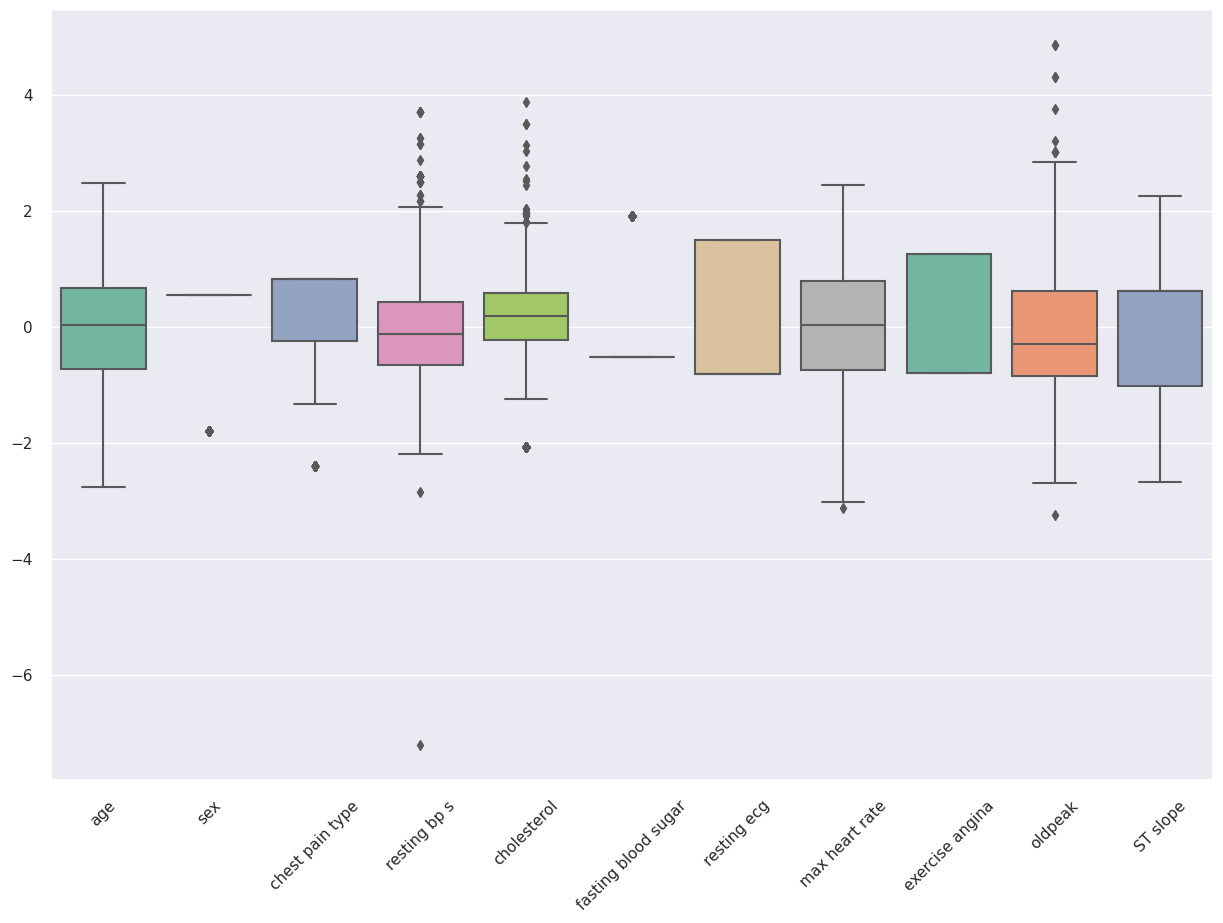

In [12]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

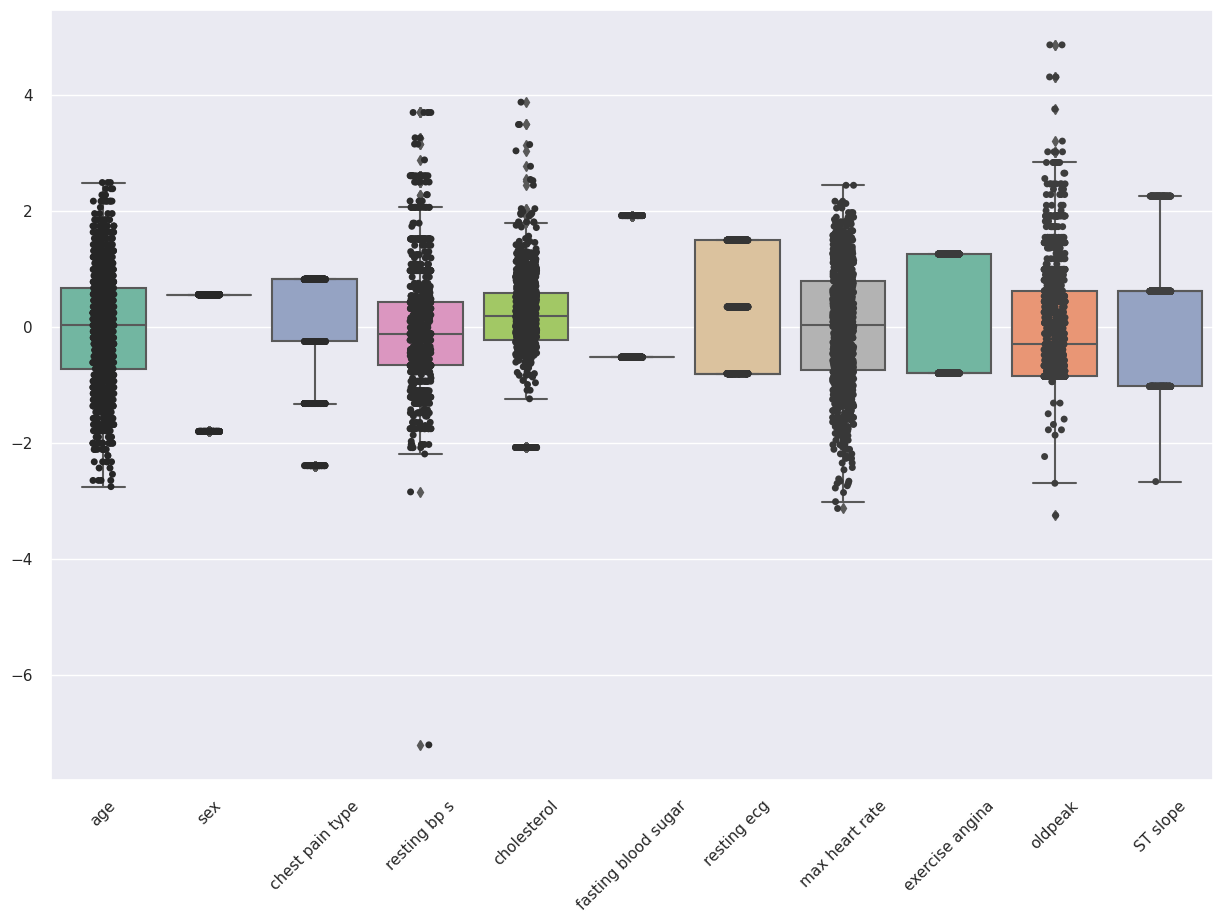

In [13]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

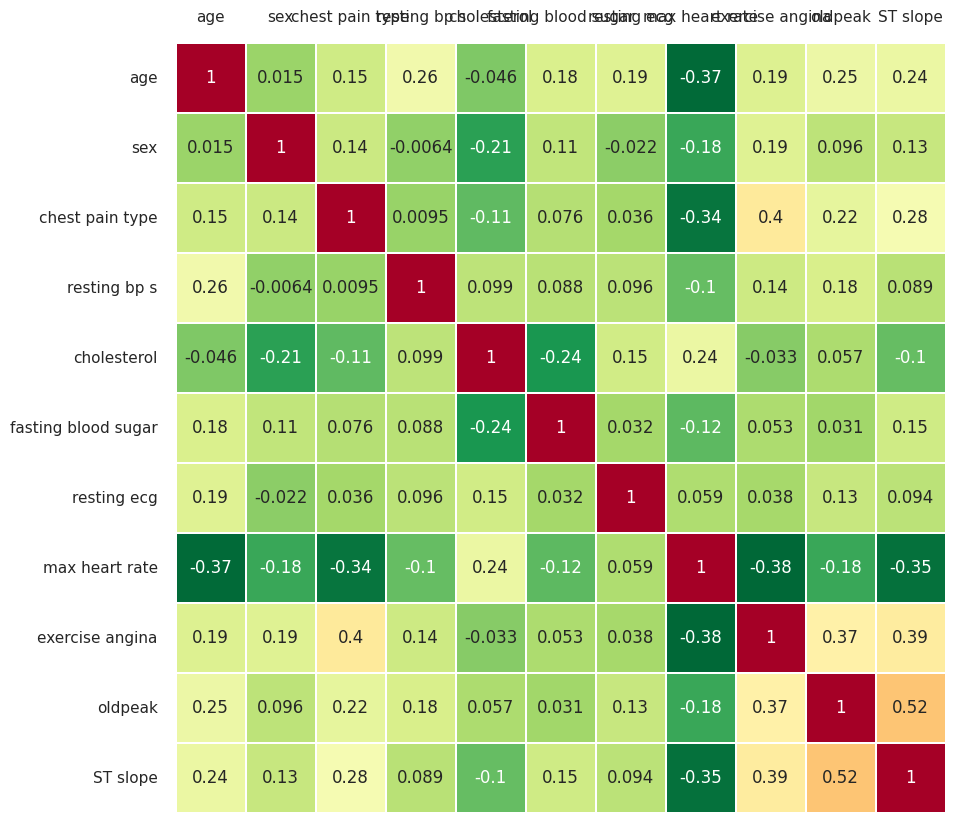

In [14]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

## **4. Dimensionality Reduction:**
**Code:** PCA is applied to reduce the number of dimensions in the dataset while attempting to preserve the most significant information.

**Purpose:** This is particularly useful in reducing the complexity of the model, enhancing visualization, and potentially improving model performance by eliminating noise.


**Principal Component Analysis (PCA**) is a statistical technique used to reduce the dimensionality of large datasets, enhancing interpretability while minimizing information loss. It transforms the original variables into a new set of variables, which are linear combinations of the original variables and are orthogonal to each other. These new variables, or principal components, are ordered so that the first few retain most of the variation present in the original variables. PCA is widely used for data visualization, noise reduction, and to improve algorithm efficiency by reducing the number of dimensions.

Text(0, 0.5, 'Z2')

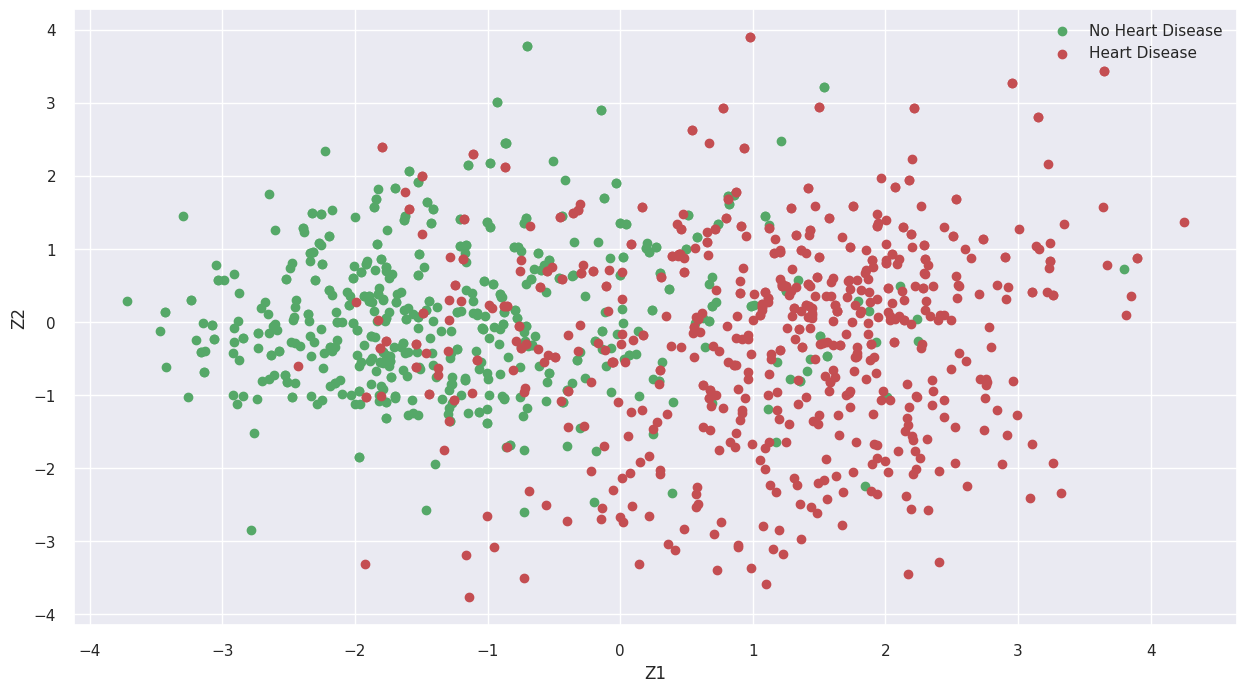

In [15]:
pca = PCA()
Z = pca.fit_transform(X)

# target->1,  target->0
idx_No_target = np.where(y == 0)
idx_target = np.where(y == 1)

plt. figure(figsize=(15,8))
plt.scatter(Z[idx_No_target,0], Z[idx_No_target,1], c='g', label='No Heart Disease')
plt.scatter(Z[idx_target,0], Z[idx_target,1], c='r', label='Heart Disease')

plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

Eigenvectors

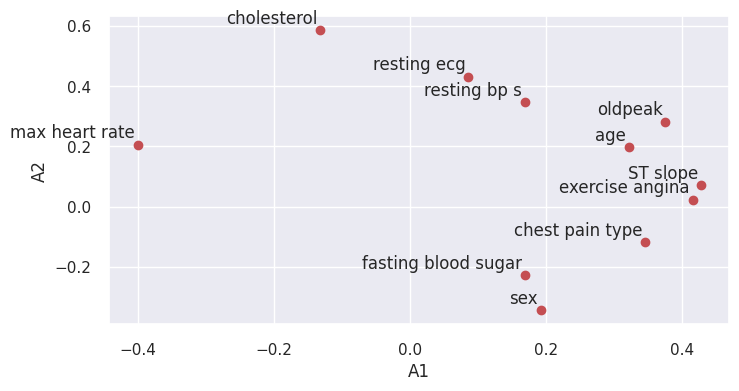

In [16]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

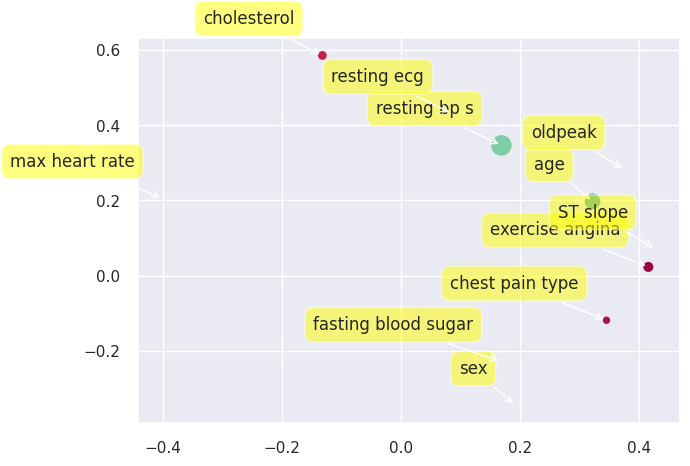

In [17]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('')
plt.ylabel('')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree plot

array([2.77451463, 1.49158382, 1.19321788, 0.9520856 , 0.88680416,
       0.86205253, 0.76334668, 0.63246906, 0.55464885, 0.49964053,
       0.39888773])

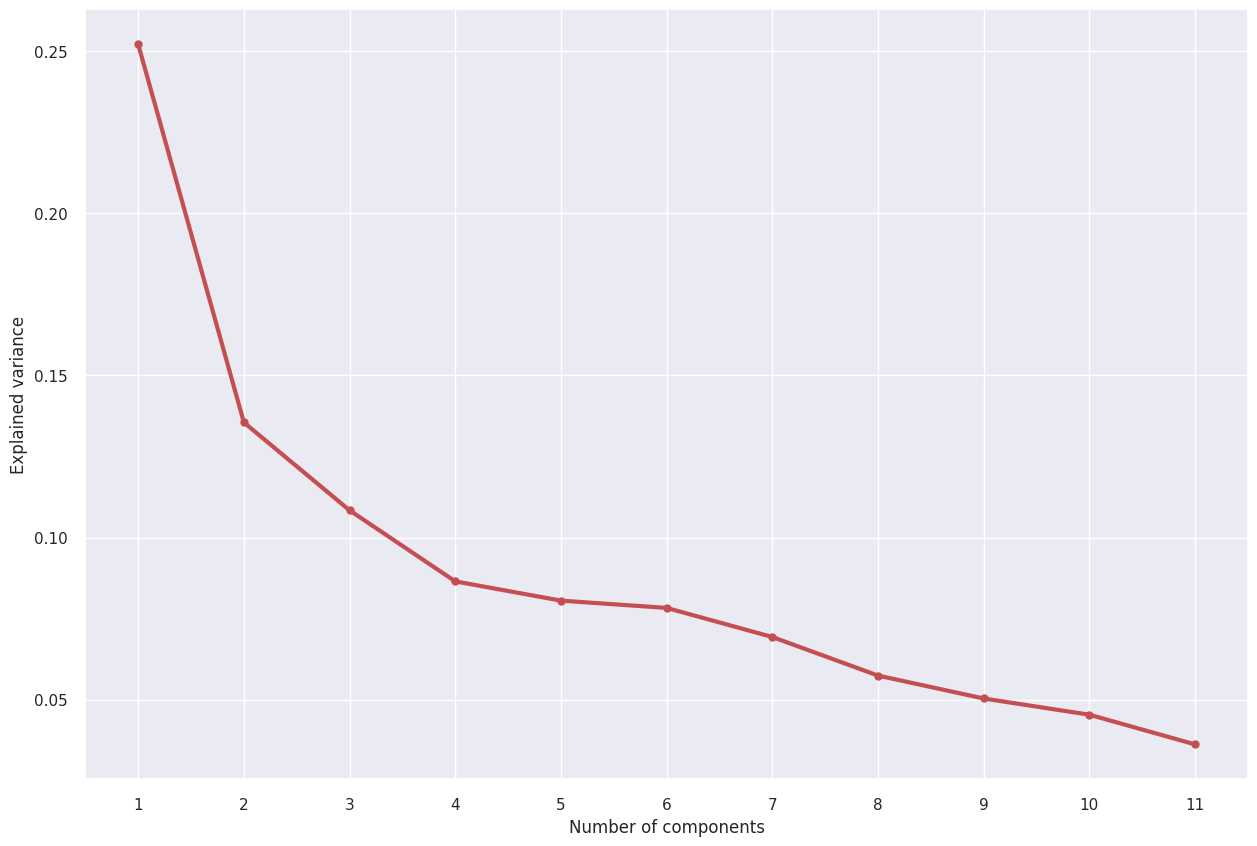

In [18]:
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

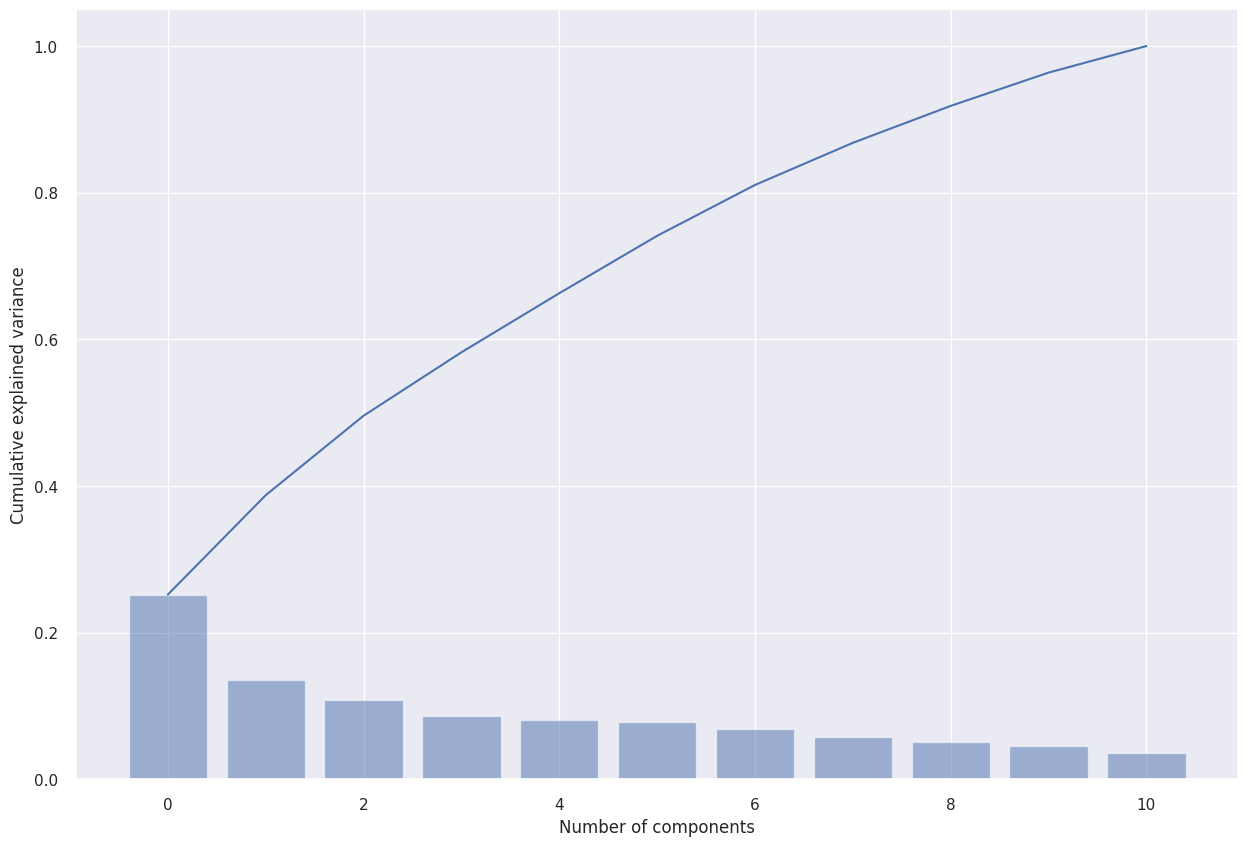

In [19]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Explained Variance per PC

In [20]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (25.2%)',
 '1': 'PC 2 (13.5%)',
 '2': 'PC 3 (10.8%)',
 '3': 'PC 4 (8.6%)',
 '4': 'PC 5 (8.1%)',
 '5': 'PC 6 (7.8%)',
 '6': 'PC 7 (6.9%)',
 '7': 'PC 8 (5.7%)',
 '8': 'PC 9 (5.0%)',
 '9': 'PC 10 (4.5%)',
 '10': 'PC 11 (3.6%)'}

Biplot

array([-0.02169655,  0.84915204, -0.40960455, ..., -0.99965055,
        1.77800348, -0.87845328])

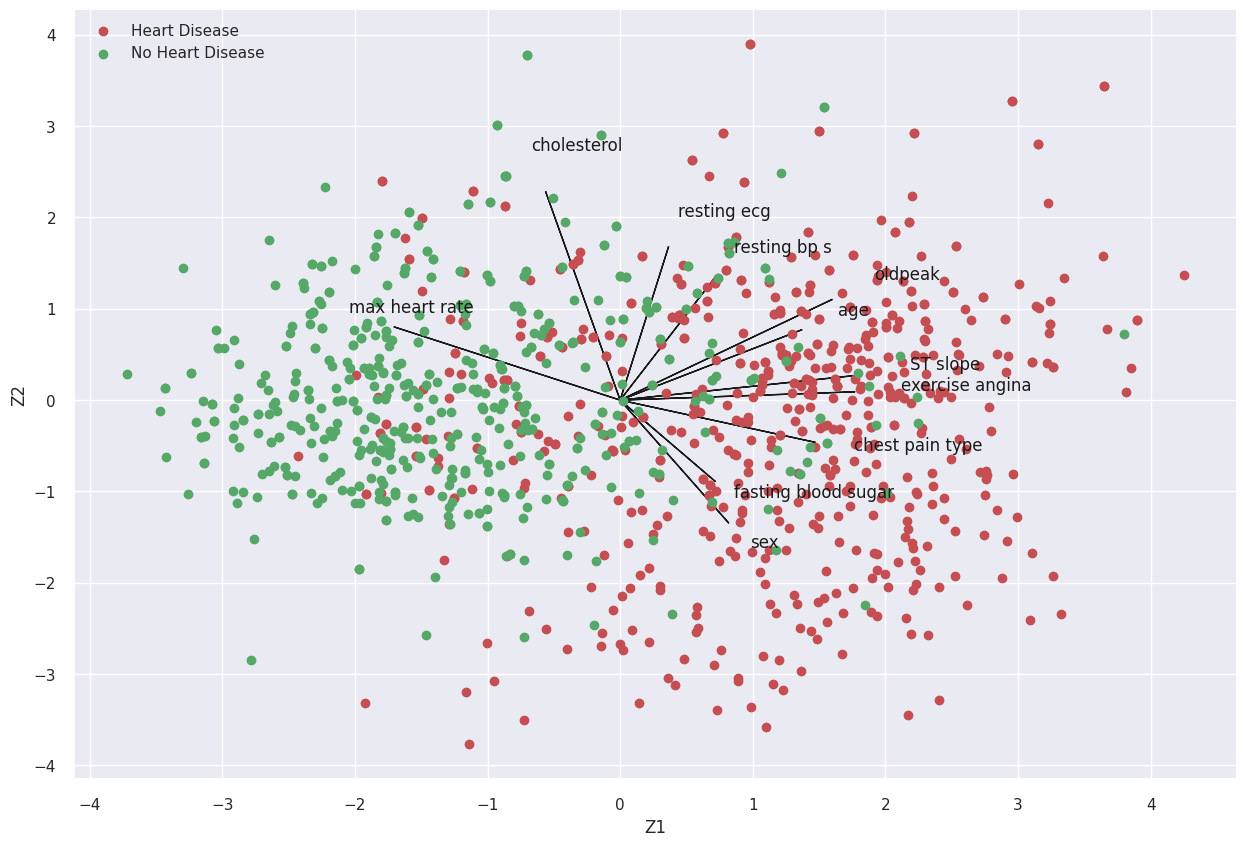

In [21]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_target,0], Z[idx_target,1], c='r', label='Heart Disease')
plt.scatter(Z[idx_No_target,0], Z[idx_No_target,1], c='g', label='No Heart Disease')

plt.legend(loc='upper left')
Z1
Z2

**Importing PCA library**

In [36]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.1 MB/s eta 0:00:00


In [22]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Principal Components

In [23]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -2.603235 -0.021697 -0.317470  0.067019 -1.685085 -0.223409 -0.156997   
1    -0.751117  0.849152  0.218999  1.361476 -0.333598  1.459255 -0.338697   
2    -1.529505 -0.409605 -0.266483  0.149029 -0.489390 -1.004022  0.683392   
3     1.118272  0.273826 -1.260783  1.714777  0.774037  0.896628 -0.724429   
4    -0.751604 -0.609897  0.568496  1.296107 -0.748685 -1.011641  0.392287   
...        ...       ...       ...       ...       ...       ...       ...   
1185 -1.298599 -0.393227 -0.732307 -0.397618 -0.941126  1.209466  1.832635   
1186  2.038180  0.031984  1.295698 -0.256069 -0.723393  1.424641 -0.308241   
1187  1.701523 -0.999651 -0.897530  0.733352 -0.009774 -0.247772  0.282241   
1188 -1.625701  1.778003  0.797530 -0.587203  1.119351  0.745602  0.609344   
1189 -2.188101 -0.878453 -0.472744 -0.057377 -1.218064 -0.328176 -0.538695   

           PC8       PC9      PC10  
0     0.154594  0.157598  0.213662  
1    -1.460228 -0.256925  0.577446  
2     0.361579  1.444878  1.559625  
3    -0.621665  0.823652  0.195292  
4    -0.099755 -0.291964  0.537590  
...        ...       ...       ...  
1185  1.069626  0.908838  0.628708  
1186  0.787981 -2.179978 -0.151764  
1187 -0.177642  0.125059 -0.343079  
1188 -0.709369  0.674303  0.028728  
1189 -0.778574 -0.361330  0.135920  

[1190 rows x 10 columns]

Scatter Plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '10 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (25.2% expl.var)', ylabel='PC2 (13.5% expl.var)'>)

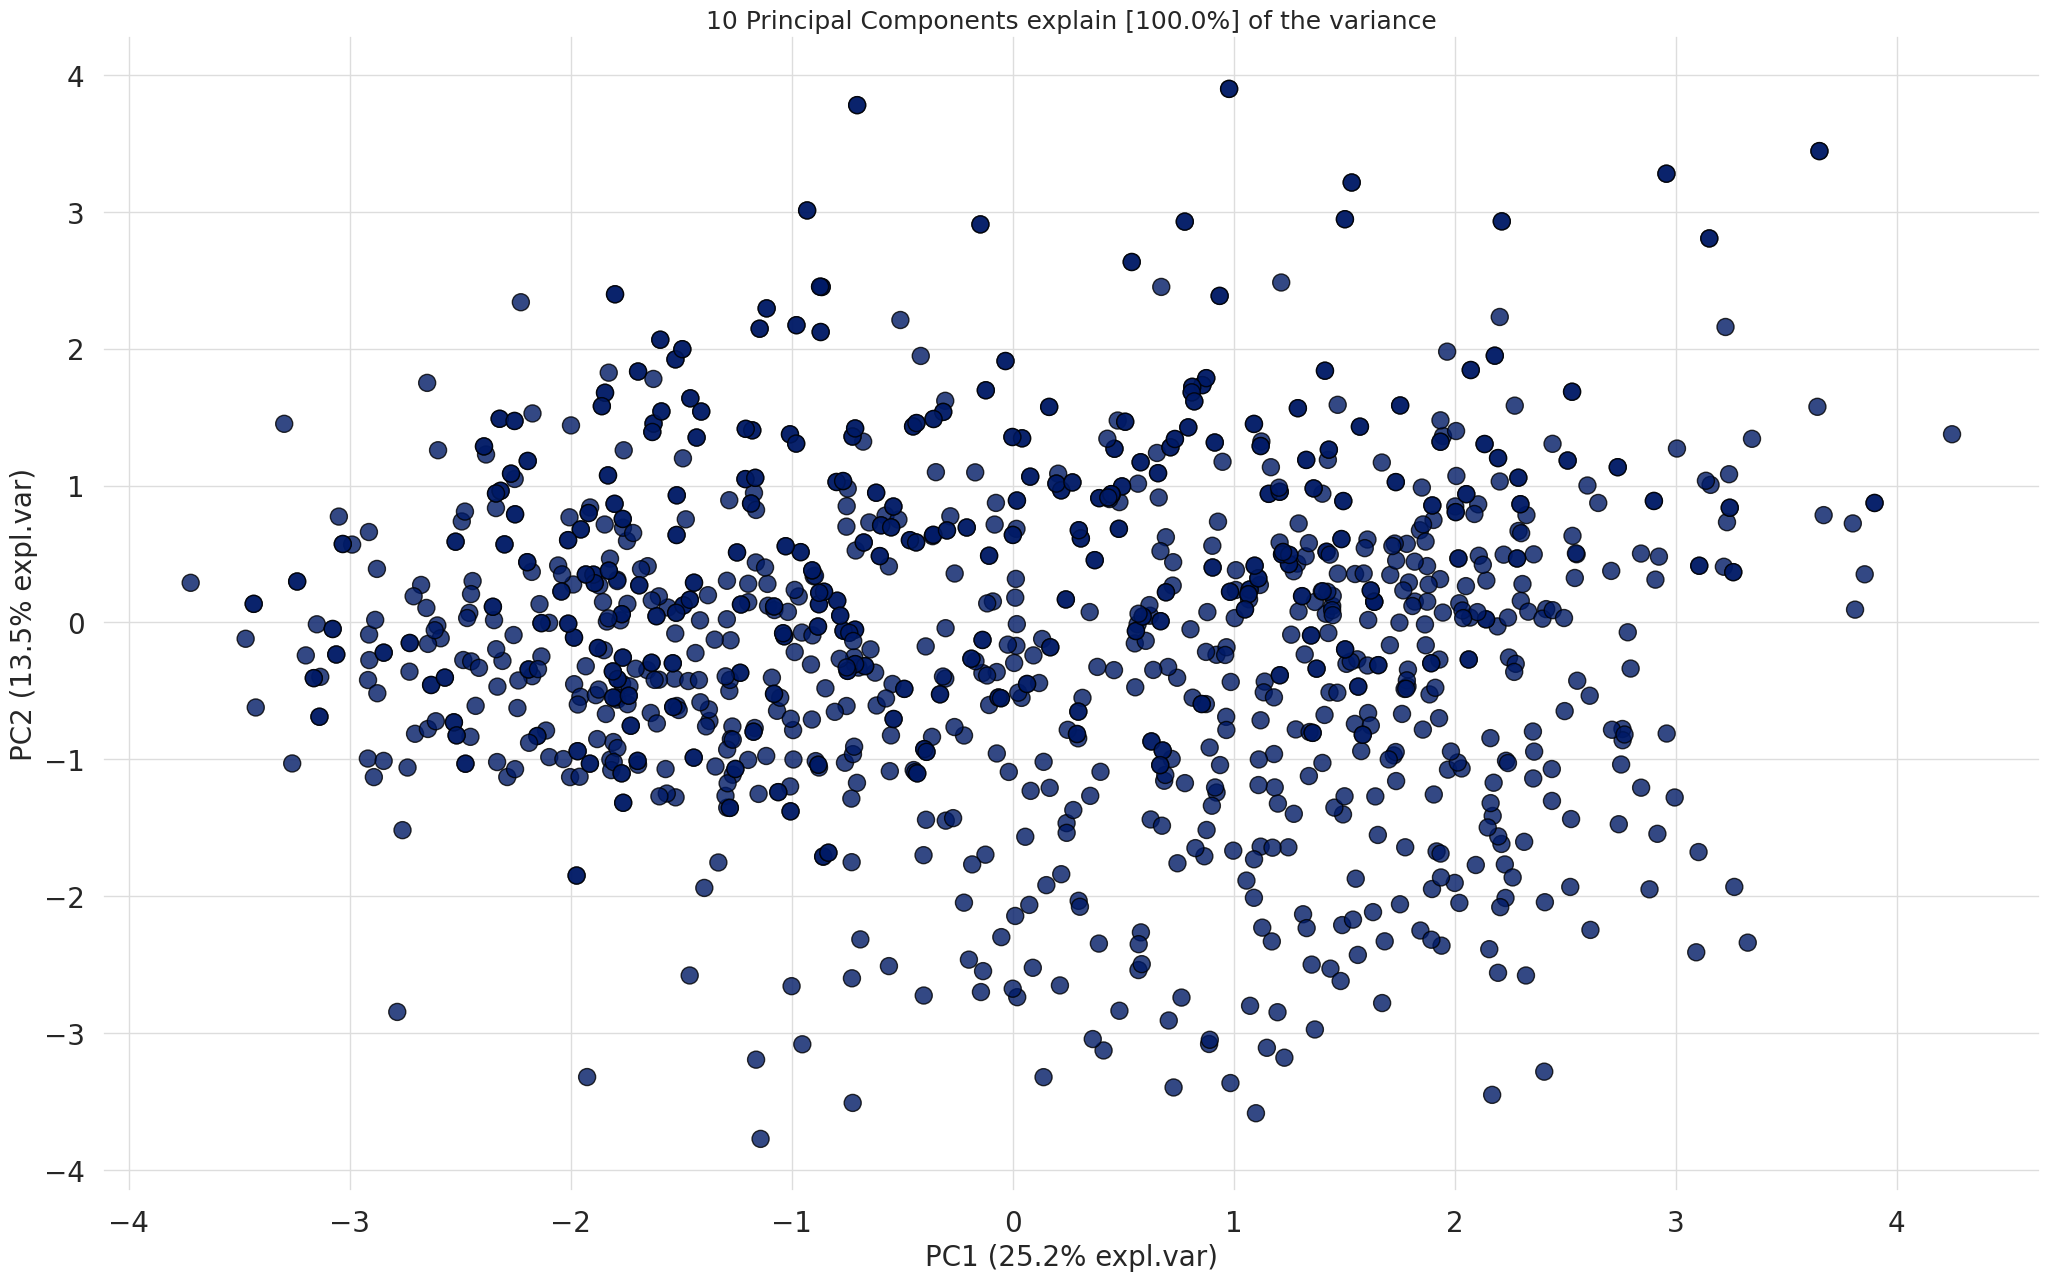

In [24]:
model.scatter(label=True, legend=False)

EigenVectors

In [25]:
A = out['loadings'].T

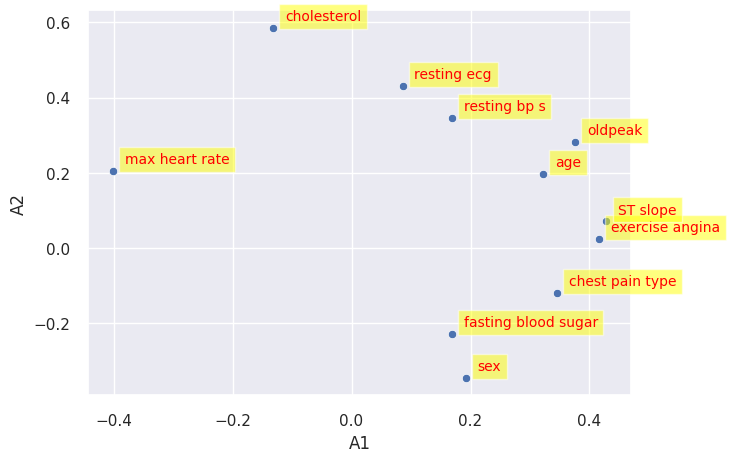

In [26]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Screen Plot

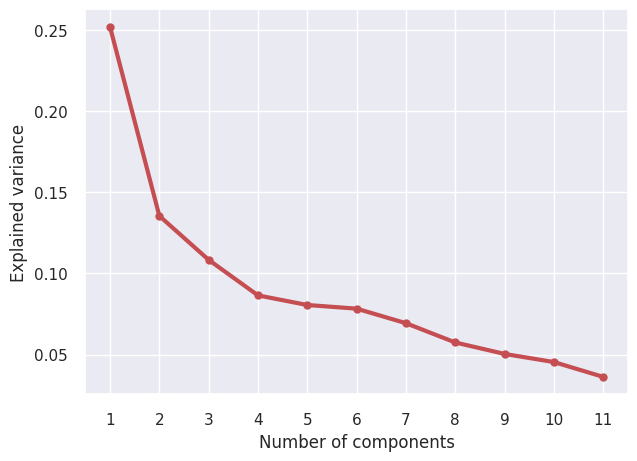

In [27]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Explained Variance Plot

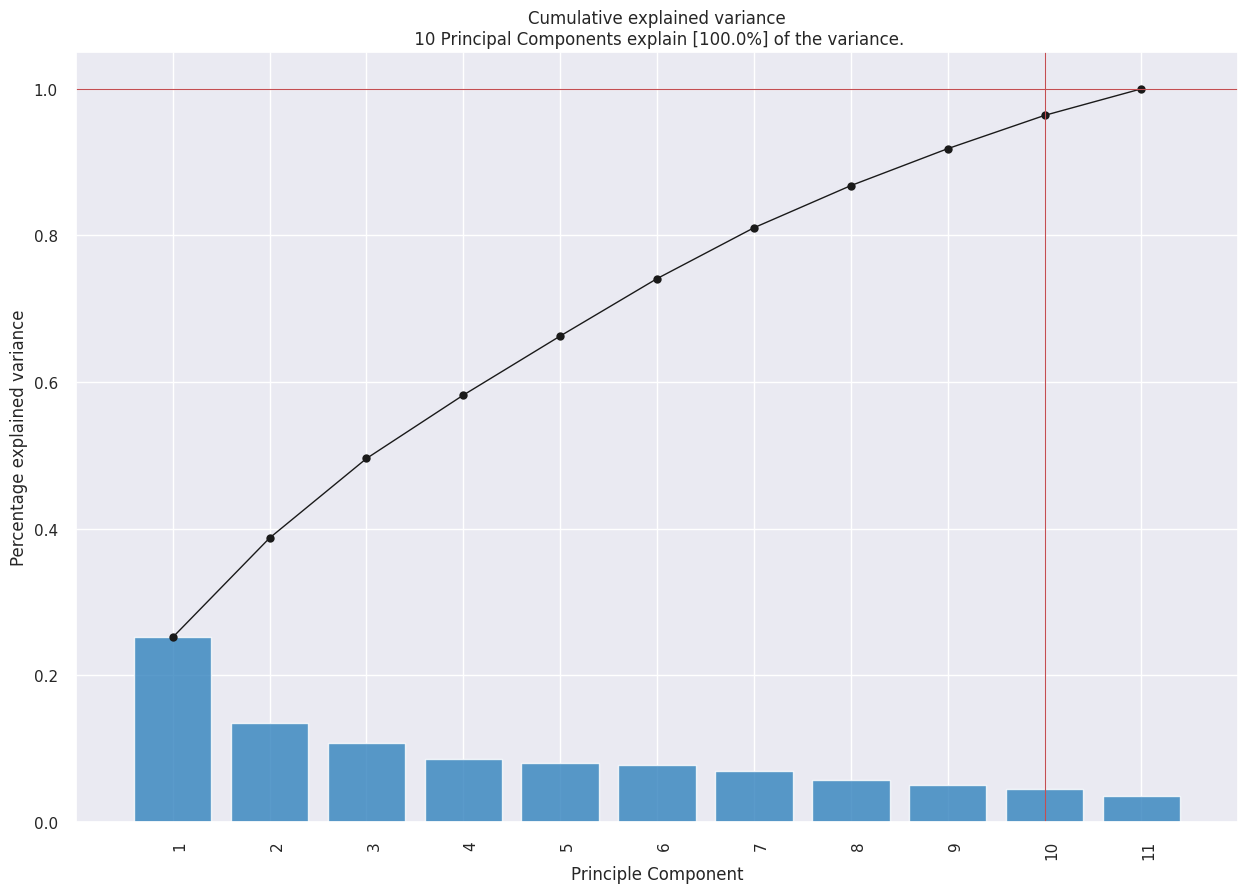

In [28]:
model.plot();

Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '10 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (25.2% expl.var)', ylabel='PC2 (13.5% expl.var)'>)

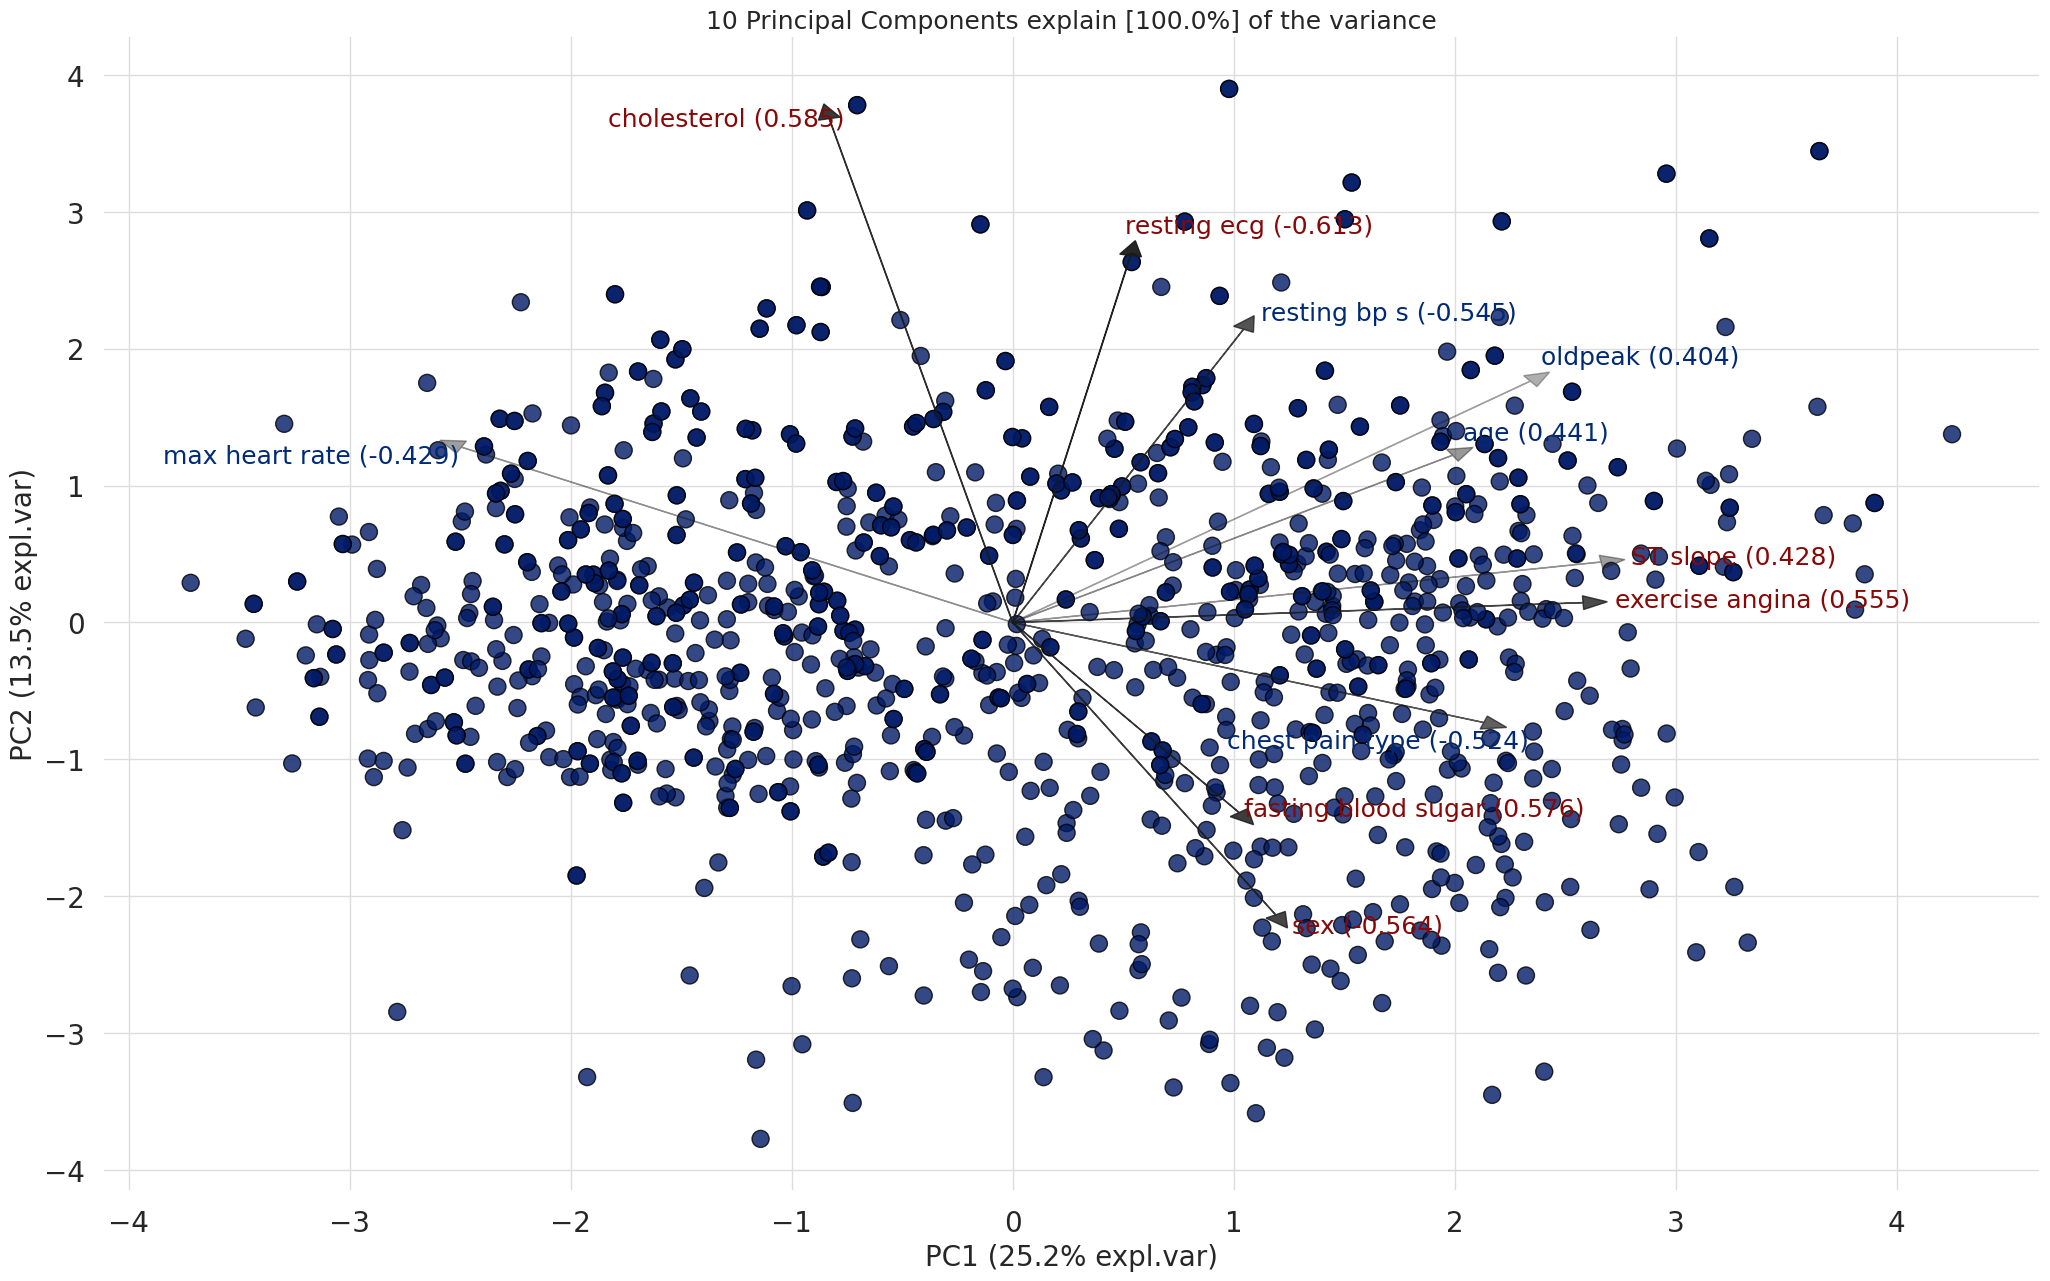

In [29]:
model.biplot(label=False, legend=False, color_arrow='k')

## **5. Model Training and Evaluation:**
**Code:** I utilize PyCaret for automating the machine learning workflow, which includes setting up the environment, comparing different models, and selecting the best performer based on predefined metrics.

**Purpose:** Streamlines the process of model selection and evaluation, providing a robust comparison across various algorithms to identify the most effective one for predicting heart disease.

In [30]:
from pycaret.utils import version
version()

'3.0.0'

Data Splitting

In [31]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1071, 12)
Unseen Data For Predictions: (119, 12)


In [39]:
!pip uninstall joblib

Found existing installation: joblib 1.4.2
Uninstalling joblib-1.4.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/joblib-1.4.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/joblib/*
Proceed (Y/n)? Y
  Successfully uninstalled joblib-1.4.2


In [40]:
!pip install joblib==1.1.0

  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
pycaret 3.0.0 requires joblib>=1.2.0, but you have joblib 1.1.0 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [1]:
from pycaret.classification import *


Using 70% of the data for training, applying normalization for scaling features, and reducing dimensionality to two principal components with PCA. This setup is aimed at streamlining the machine learning workflow, ensuring reproducibility with a fixed session ID, and optimizing model performance through feature scaling and dimensionality reduction.

In [32]:
clf_pca = setup(data=df, target='target', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

Comparing All Models

In [33]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [34]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

The create_model function in PyCaret is used to train and evaluate machine learning models automatically. It simplifies model selection, handles default parameters, performs training on the dataset, and computes performance metrics using cross-validation, making it highly efficient for identifying optimal models quickly.

## **Random Forest Classifier**

In [35]:
#	Create Random Forest Classifier Model
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The Random Forest model achieved an average accuracy of approximately 86%, with some variability across different folds. This suggests a generally high level of model performance, with the model correctly classifying a significant majority of cases.

The Area Under the Curve (AUC), which measures the ability of the classifier to avoid false classifications and ranges from 0 to 1, averaged around 90%. This is indicative of a very good predictive performance, particularly in distinguishing between the classes.

Precision and recall scores are also robust, averaging about 86% and 88% respectively. These metrics are crucial, especially in medical diagnostic applications where the cost of false negatives (failing to identify a disease) and false positives (incorrectly identifying the disease) can be high.

In [36]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [37]:
#Tune Random Forest Classifier Model
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [38]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

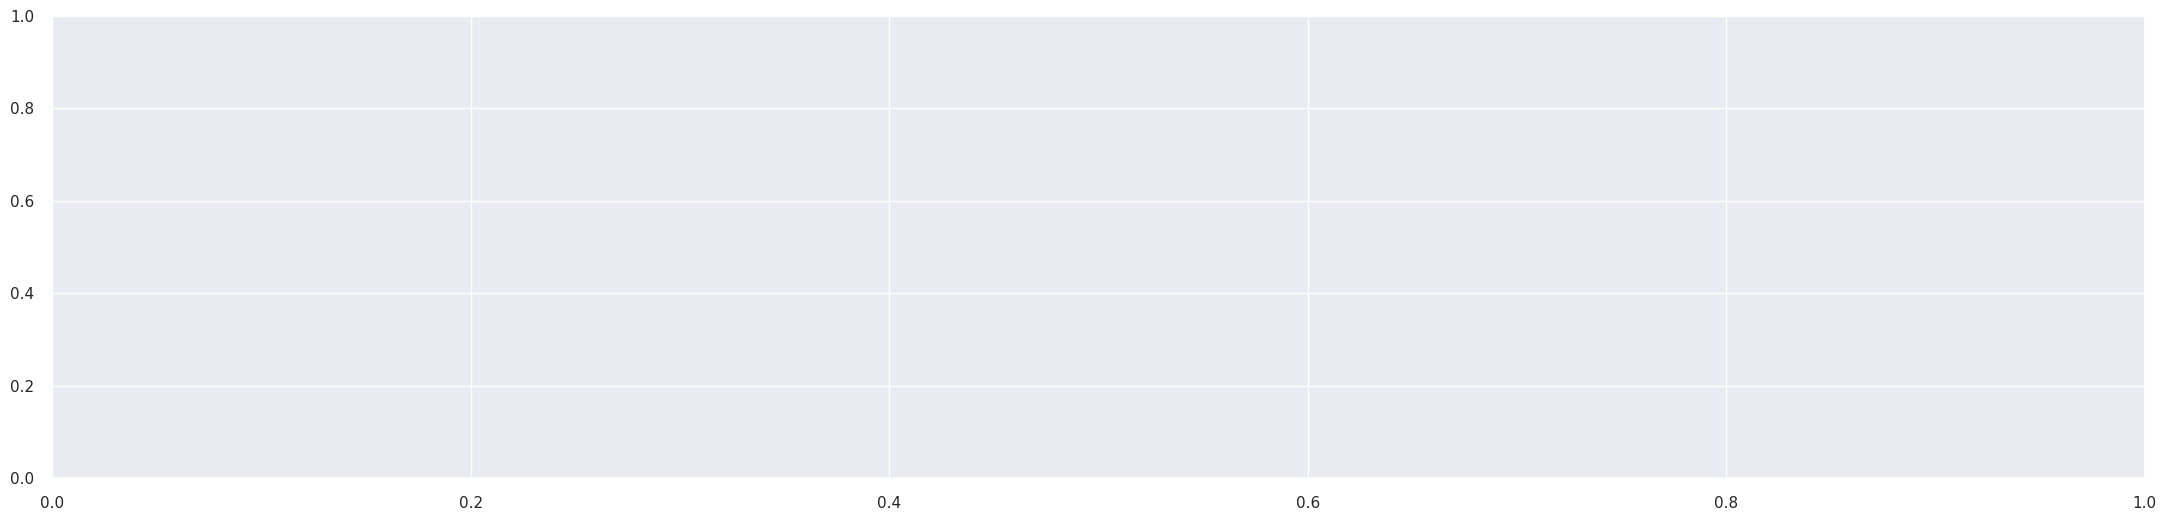

In [39]:
#Evaluate Random Forest Classifier Model
evaluate_model(tuned_rf)

**1. Performance Metrics Overview:**
The model achieves an average accuracy of 86% and an AUC of 90%, indicating strong predictive performance with high reliability in classification tasks.

**2. Cross-Validation Consistency:**
Consistent scores across folds confirm model stability and generalizability, with no evident overfitting.

**3. Tuning Effectiveness:**
Post-tuning metrics show refined precision and recall, optimizing the model's performance for balanced sensitivity and specificity.

**4. Key Takeaways:**
The Random Forest Classifier proves to be robust and effective, suitable for high-stakes applications like medical diagnosis, backed by high precision, recall, and AUC scores.

## **Naive Bayes**

In [40]:
#Create Naive Bayes Model
nb = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [41]:
nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
#Tune Naive Bayes Model
tuned_nb = tune_model(nb)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [43]:
tuned_nb

GaussianNB(priors=None, var_smoothing=1e-09)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

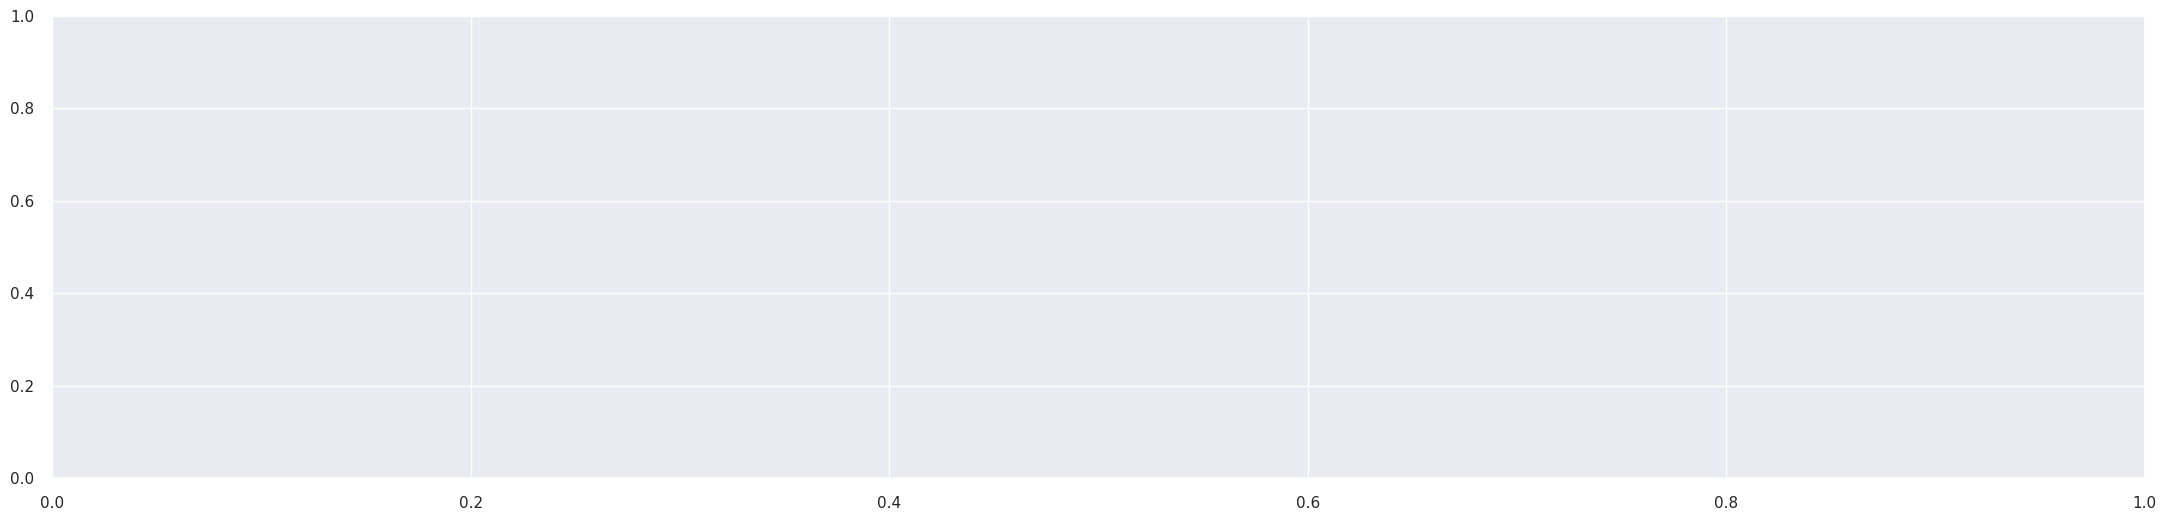

In [44]:
#Evaluate Naive Bayes Model
evaluate_model(tuned_nb)

**1. Performance Metrics Overview:**
Initial training shows an average accuracy of 81% and AUC of 88%, indicating good model effectiveness in classifying the data correctly.

**2. Cross-Validation Consistency:**
The model exhibits some variation in metrics across folds, highlighting areas where model robustness can be improved.

**3. Tuning Effectiveness:**
Post-tuning, the Naive Bayes classifier maintains similar performance, with fine-tuning reflected in consistent precision and recall scores.

**4. Key Takeaways:**
The Naive Bayes classifier demonstrates a strong baseline performance with potential for enhancements through tuning, suitable for probabilistic predictions and classifications in varied applications.

## **Decision Tree Classifier**

In [45]:
#Create Decision Tree Classifier Model
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [47]:
#Tune Decision Tree Classifier Model
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [48]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

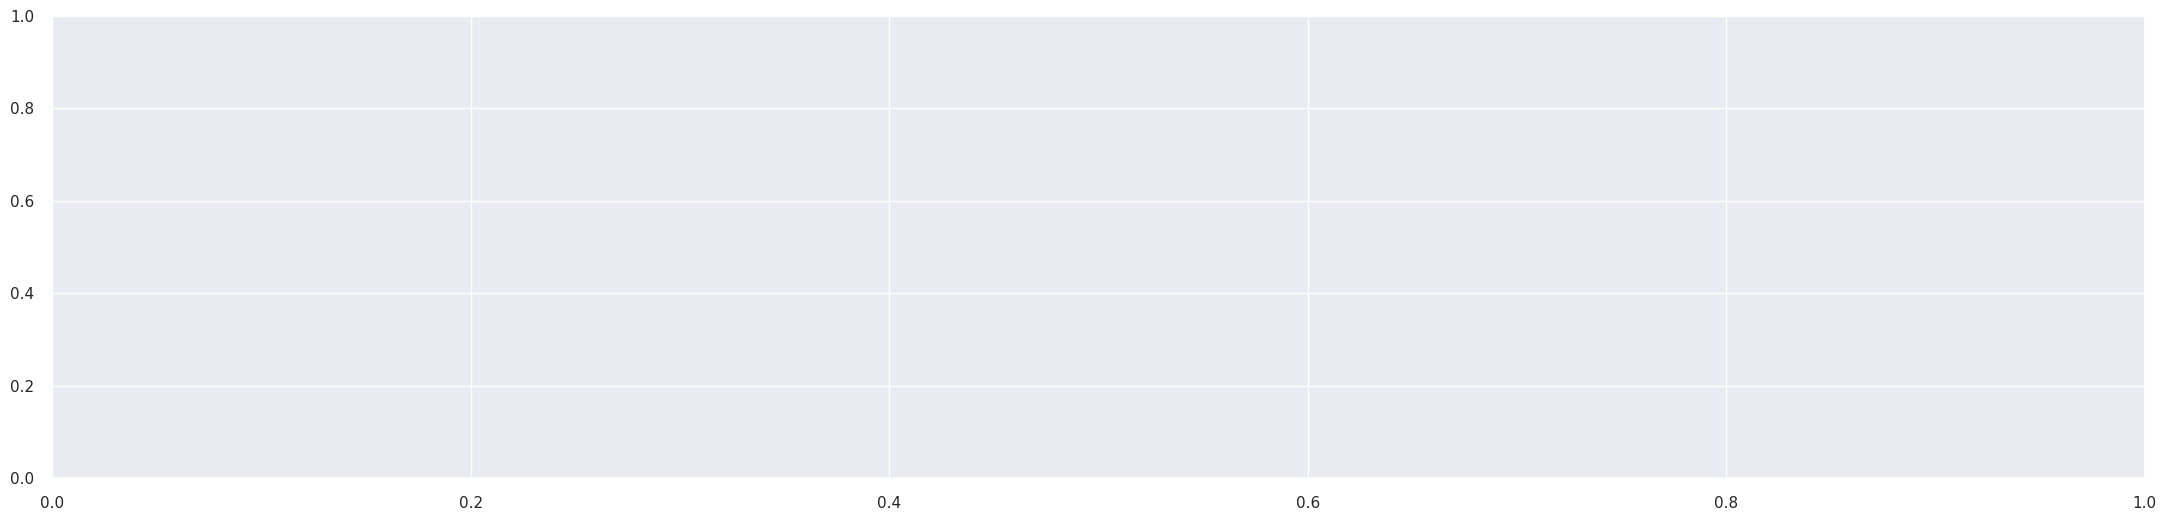

In [49]:
#Evaluate Decision Tree Classifier Model
evaluate_model(tuned_dt)

## **Logistic Regression**

In [50]:
#Create Logistic Regression Model
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#Tune Logistic Regression Model
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
tuned_lr

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

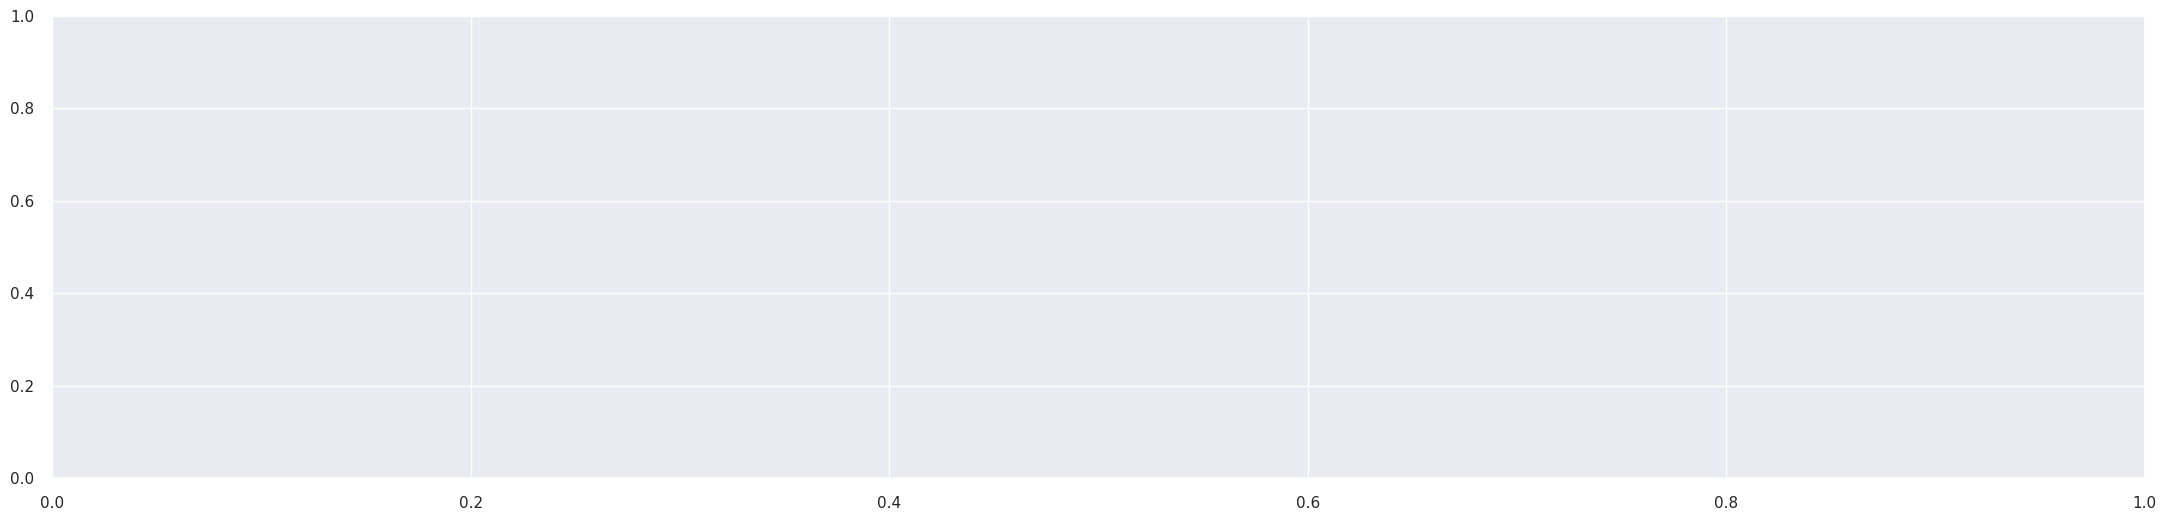

In [54]:
#Evaluate Logistic Regression Model
evaluate_model(lr)

## **SVM - Linear Kernel**

In [55]:
#Create SVM Model
svm = create_model('svm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
svm

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
#Tune SVM Model
tuned_svm = tune_model(svm)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [58]:
tuned_svm

SGDClassifier(alpha=0.002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=False,
              l1_ratio=0.6000000001, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

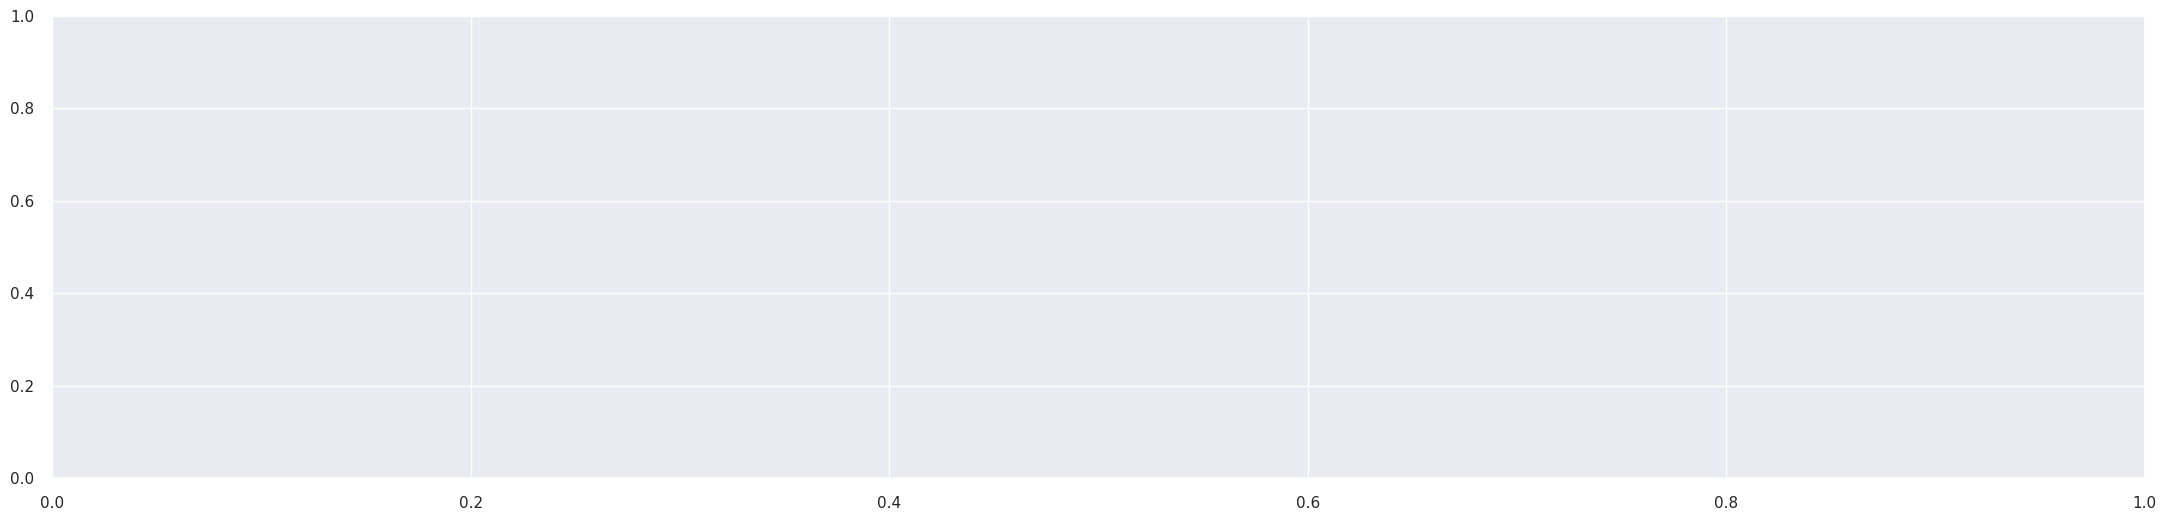

In [59]:
#Evaluate SVM Model
evaluate_model(tuned_svm)

## **K Neighbors Classifier**

In [60]:
#Create KNN Model
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [61]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
#Tune KNN Model
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [63]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='distance')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

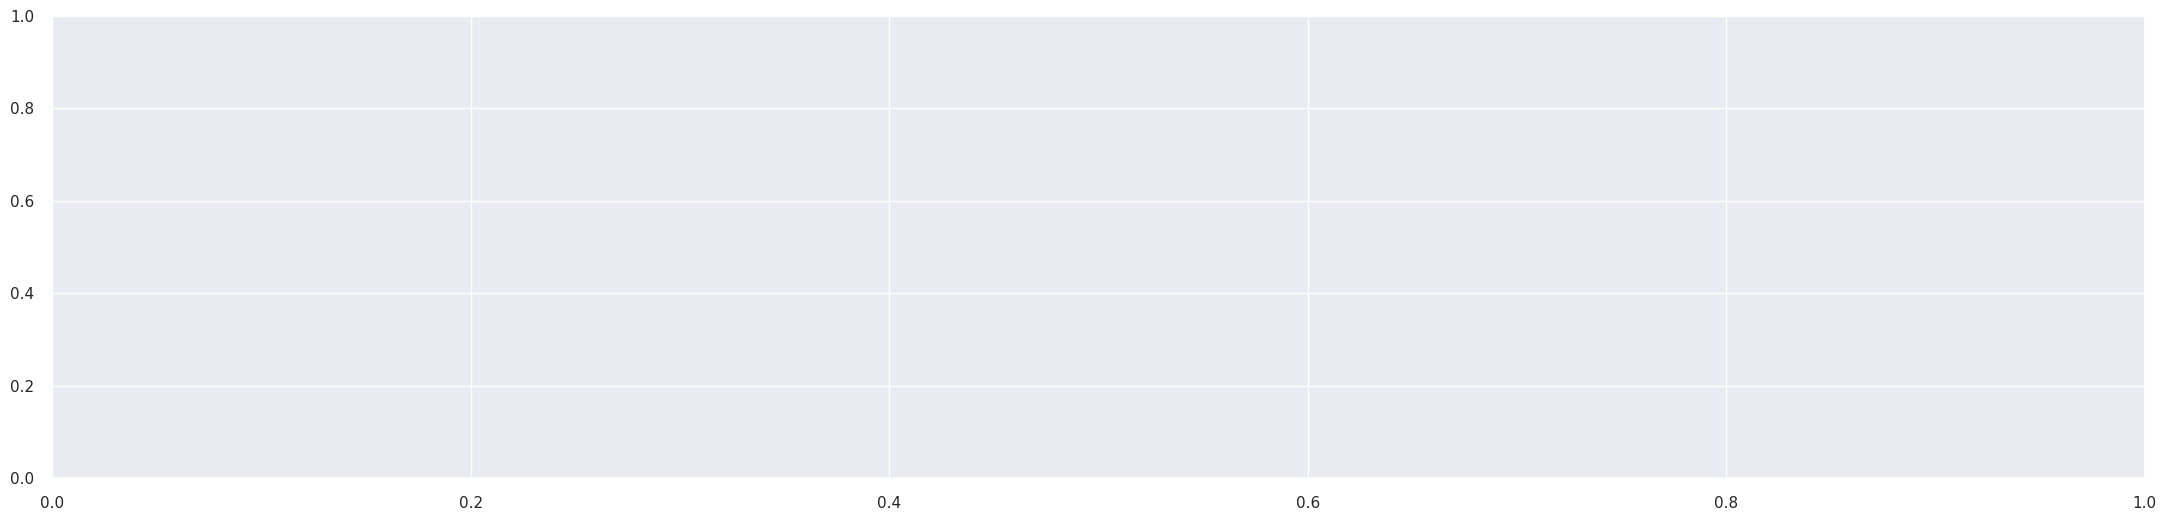

In [64]:
#Evaluate KNN Model
evaluate_model(tuned_knn)

**Tune the Best Model**

In [65]:
#Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [66]:
tuned_best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

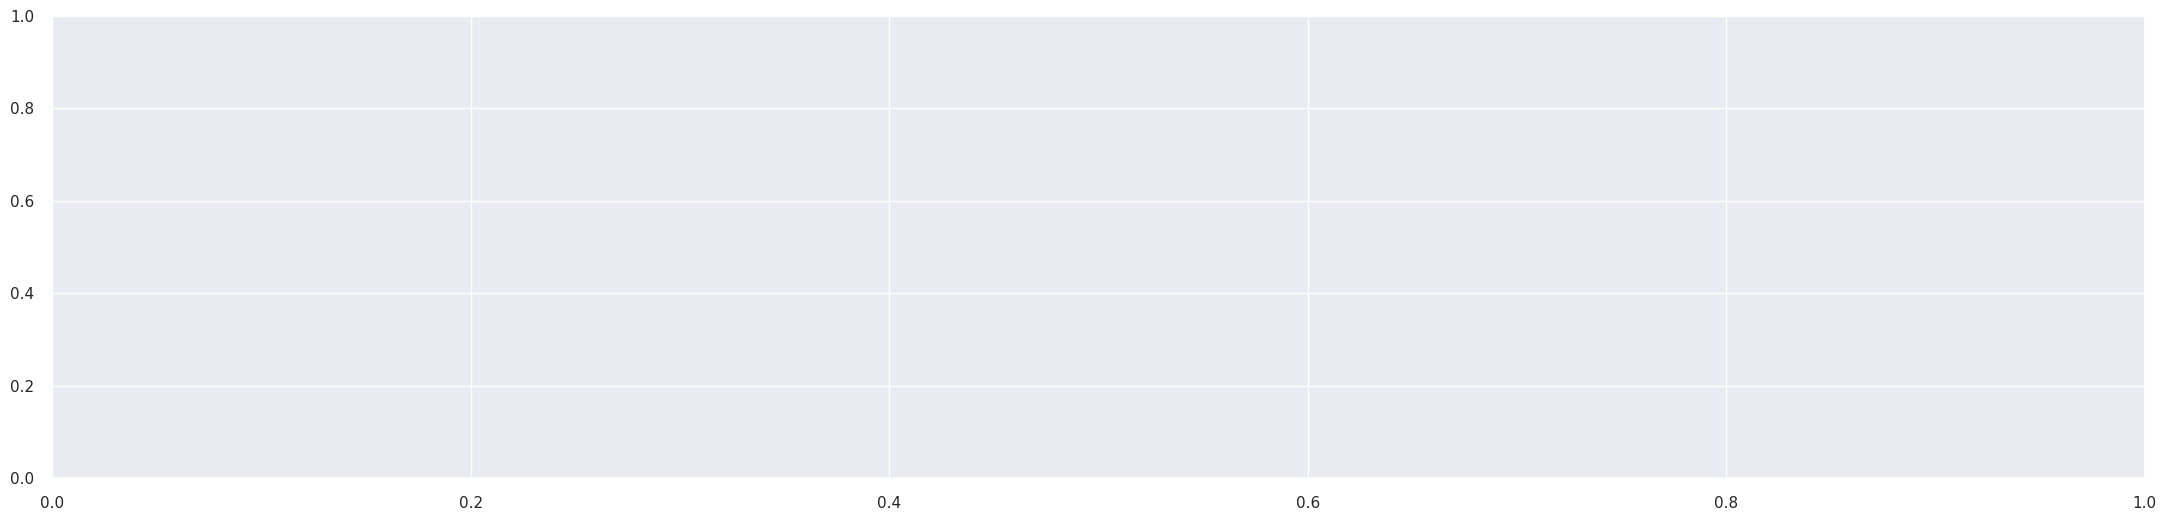

In [67]:
evaluate_model(tuned_best_model)

## **Classification + PCA**

In [68]:
clf_pca = setup(data=df, target='target', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)


In [69]:
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [70]:
best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

Tune the Best Model

In [71]:
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [72]:
tuned_best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

Evaluate the Best Model

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

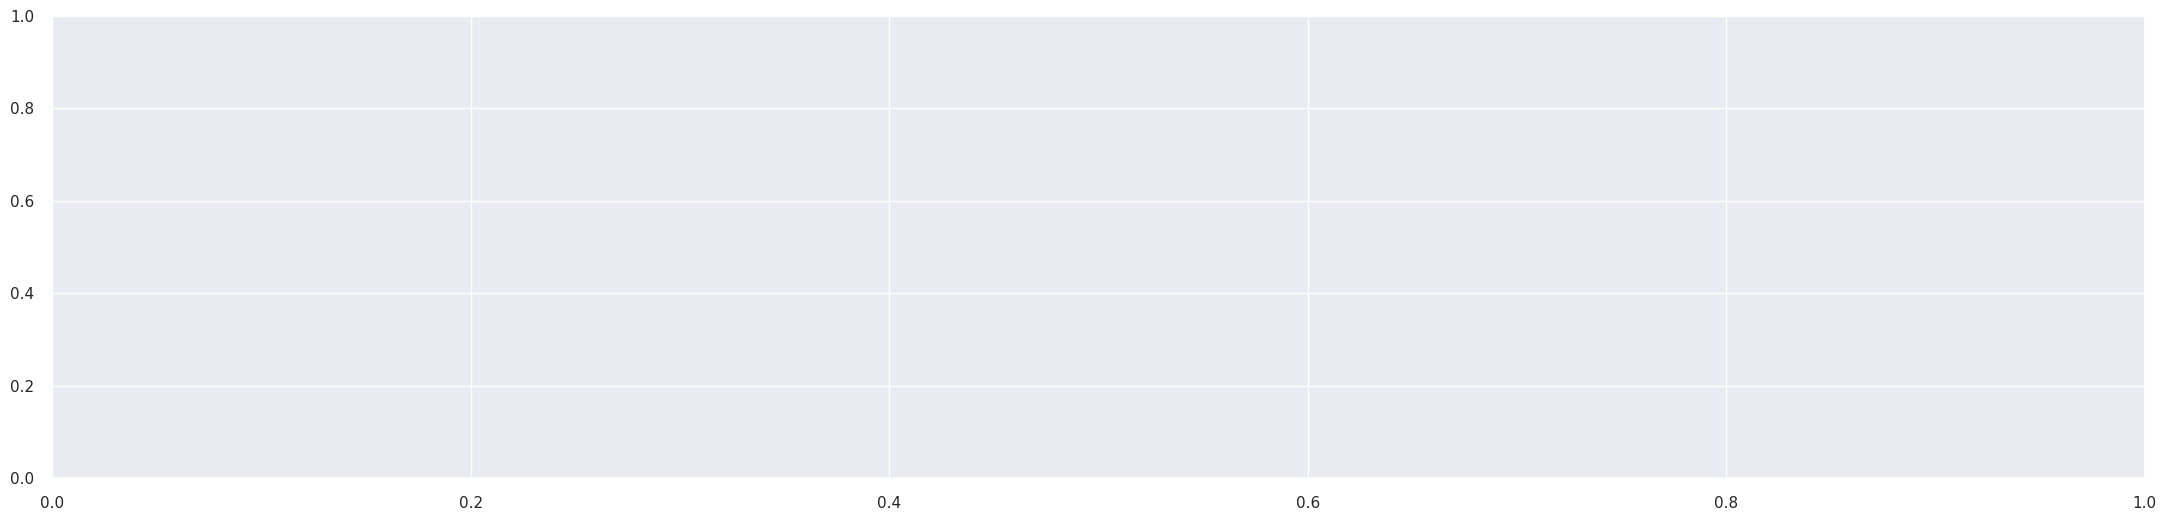

In [73]:
evaluate_model(tuned_best_model_pca)

**SHAP (SHapley Additive exPlanations)** is a game theory-based approach for explaining the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from cooperative game theory.

**Shapley Values:** These values provide a way to fairly distribute the "payout" (or influence) among the features in a model, based on their contribution to the prediction. The key idea is to consider the contribution of each feature to the prediction by simulating the insertion of each feature into a coalition of features and averaging its marginal contribution across all possible combinations.

In [2]:
!pip3 install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 25.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [74]:
import shap

In [75]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [76]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


from matplotlib import pyplot as plt
import seaborn as sns
_df_14.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

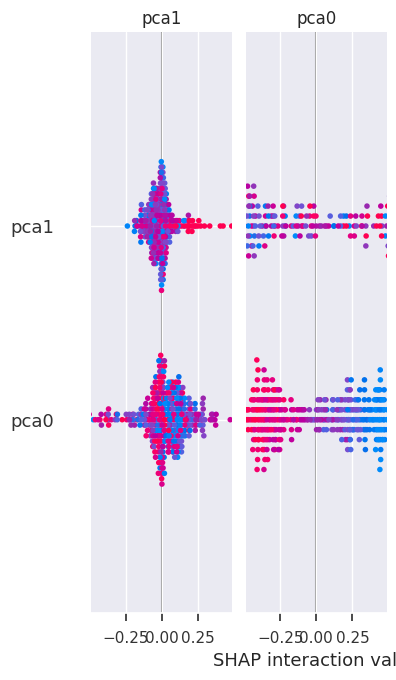

In [77]:
interpret_model(tuned_rf_pca, plot='summary')

**Feature Distribution:** Each dot represents the SHAP value for an instance, showing how much influence each PCA feature has on pushing the model's output higher or lower.

**Color Coding:** The colors indicate the feature value's magnitude, helping to visualize how higher or lower values of PCA features affect the prediction.

**Impact Direction:** The placement of dots to the left or right of the center line (zero) shows whether the feature generally increases or decreases the prediction outcome.

In [1]:
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 25.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of autoviz to determine which version is compatible with other requir

In [ ]:
#interpret_model(tuned_rf_pca, plot='reason', observation=1)

DimensionError: Length of features is not equal to the length of shap_values!

## **Visualize a single prediction**

In [78]:
predictions = predict_model(tuned_rf_pca, data=data_unseen)

In [79]:
single_prediction = predictions.iloc[0]
print(single_prediction)

age                     39.00
sex                      1.00
chest pain type          3.00
resting bp s           120.00
cholesterol            339.00
fasting blood sugar      0.00
resting ecg              0.00
max heart rate         170.00
exercise angina          0.00
oldpeak                  0.00
ST slope                 1.00
target                   0.00
prediction_label         0.00
prediction_score         0.91
Name: 0, dtype: float64


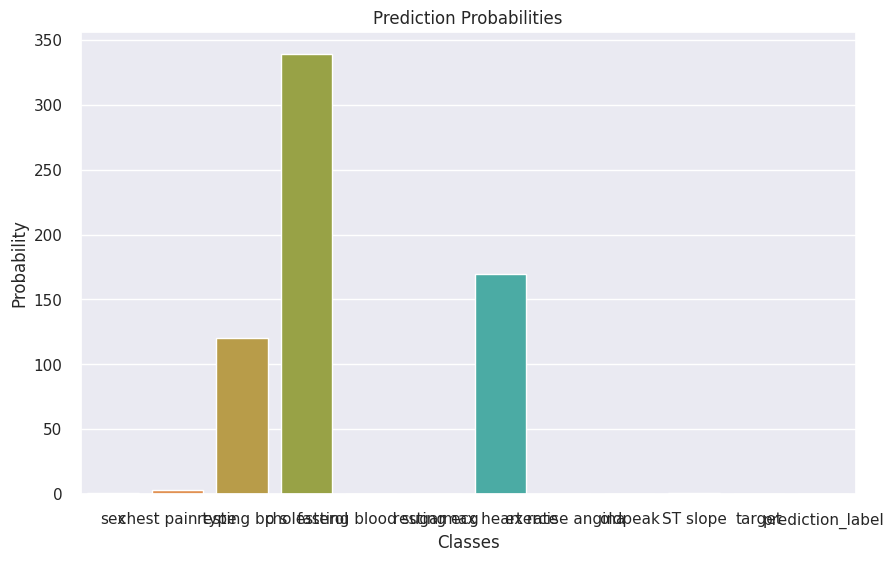

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample code for visualizing prediction probabilities for a classification problem
if 'target' in predictions.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=predictions.columns[1:-1], y=single_prediction[1:-1])  # Skip ID and Label columns if present
    plt.title('Prediction Probabilities')
    plt.ylabel('Probability')
    plt.xlabel('Classes')
    plt.show()